In [400]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py as h5
import math
import os
from shapely.geometry import Point, Polygon
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


## Class to pull data from MINERvA file

In [475]:

class Mx2Data:
    def __init__(self, filename):
        self.file = uproot.open(filename)
        
        self.hits_id_per_mod = self.file["minerva"]["hits_id_per_mod"].array(library="np")
        self.hit_strip = self.file["minerva"]["hit_strip"].array(library="np")
        self.hit_plane = self.file["minerva"]["hit_plane"].array(library="np")
        self.hit_module = self.file["minerva"]["hit_module"].array(library="np")
        self.hit_view = self.file["minerva"]["hit_view"].array(library="np")
        self.n_odhits = self.file["minerva"]["n_odhits"].array(library="np")
        self.hits_od_per_mod = self.file["minerva"]["hits_od_per_mod"].array(library="np")
        self.hit_bar = self.file["minerva"]["hit_bar"].array(library="np")
        self.hit_pe = self.file["minerva"]["hit_pe"].array(library="np")
        self.hit_time = self.file["minerva"]["hit_time"].array(library="np")
        self.hit_time_slice = self.file["minerva"]["hit_time_slice"].array(library="np")
        self.hit_norm_energy = self.file["minerva"]["hit_norm_energy"].array(library="np")

        self.offsetX = self.file["minerva"]["offsetX"].array(library="np")
        self.offsetY = self.file["minerva"]["offsetY"].array(library="np")
        self.offsetZ = self.file["minerva"]["offsetZ"].array(library="np")

        self.ev_gps_time_sec = self.file["minerva"]["ev_gps_time_sec"].array(library="np")
        self.ev_gps_time_usec = self.file["minerva"]["ev_gps_time_usec"].array(library="np")

        self.n_slices = self.file["minerva"]["n_slices"].array(library="np")

        self.clus_id_coord = self.file["minerva"]["clus_id_coord"].array(library="np")
        self.clus_id_z = self.file["minerva"]["clus_id_z"].array(library="np")
        self.clus_id_module = self.file["minerva"]["clus_id_module"].array(library="np")
        self.clus_id_strip = self.file["minerva"]["clus_id_strip"].array(library="np")
        self.clus_id_view = self.file["minerva"]["clus_id_view"].array(library="np")
        self.clus_id_pe = self.file["minerva"]["clus_id_pe"].array(library="np")
        self.clus_id_energy = self.file["minerva"]["clus_id_energy"].array(library="np")
        self.clus_id_time_slice = self.file["minerva"]["clus_id_time_slice"].array(library="np")
        self.clus_id_time = self.file["minerva"]["clus_id_time"].array(library="np")
        self.clus_id_type = self.file["minerva"]["clus_id_type"].array(library="np")
        self.clus_id_hits_idx = self.file["minerva"]["clus_id_hits_idx"].array(library="np")
        self.clus_id_size = self.file["minerva"]["clus_id_size"].array(library="np")

        self.minerva_time = (self.ev_gps_time_sec - self.ev_gps_time_sec[0])*1e6+(self.ev_gps_time_usec)
        self.minerva_trigger = np.array(self.minerva_time/1.2e6).astype(int)

        self.hits_id_per_mod = self.file["minerva"]["hits_id_per_mod"].array(library="np")
        self.hit_strip = self.file["minerva"]["hit_strip"].array(library="np")
        
        self.n_tracks = self.file["minerva"]["n_tracks"].array(library="np") 
        self.n_blobs_id = self.file["minerva"]["n_blobs_id"].array(library="np")
        self.trk_vis_energy = self.file["minerva"]["trk_vis_energy"].array(library="np")
        self.trk_type = self.file["minerva"]["trk_type"].array(library="np")
        self.trk_patrec = self.file["minerva"]["trk_patrec"].array(library="np")
        self.trk_time_slice = self.file["minerva"]["trk_time_slice"].array(library="np")
        self.trk_chi2perDof = self.file["minerva"]["trk_chi2perDof"].array(library="np")
        self.trk_node_chi2 = self.file["minerva"]["trk_node_chi2"].array(library="np")
        self.trk_index = self.file["minerva"]["trk_index"].array(library="np")
        self.trk_nodes = self.file["minerva"]["trk_nodes"].array(library="np")
        self.trk_node_X = self.file["minerva"]["trk_node_X"].array(library="np")
        self.trk_node_Y = self.file["minerva"]["trk_node_Y"].array(library="np")
        self.trk_node_Z = self.file["minerva"]["trk_node_Z"].array(library="np")
        self.trk_node_qOverP = self.file["minerva"]["trk_node_qOverP"].array(library="np")
        self.trk_node_cluster_idx = self.file["minerva"]["trk_node_cluster_idx"].array(library="np")
        
        self.vtx_x = self.file["minerva"]["vtx_x"].array(library="np")
        self.vtx_y = self.file["minerva"]["vtx_y"].array(library="np")
        self.vtx_z = self.file["minerva"]["vtx_z"].array(library="np")
        self.vtx_tracks_idx = self.file["minerva"]["vtx_tracks_idx"].array(library="np")
        
        
        self.trk_theta = self.file["minerva"]["trk_theta"].array(library="np")
        self.trk_phi = self.file["minerva"]["trk_phi"].array(library="np")


        
        self.mc_id_module = self.file["minerva"]["mc_id_module"].array(library="np")        
        self.mc_id_strip = self.file["minerva"]["mc_id_strip"].array(library="np")        
        self.mc_id_view = self.file["minerva"]["mc_id_view"].array(library="np")
        self.mc_id_dE = self.file["minerva"]["mc_id_dE"].array(library="np")
        self.mc_id_pe = self.file["minerva"]["mc_id_pe"].array(library="np")
        
        self.mc_id_nmchit = self.file["minerva"]["mc_id_nmchit"].array(library="np")
        self.mc_id_mchit_x = self.file["minerva"]["mc_id_mchit_x"].array(library="np")
        self.mc_id_mchit_y = self.file["minerva"]["mc_id_mchit_y"].array(library="np")
        self.mc_id_mchit_z = self.file["minerva"]["mc_id_mchit_z"].array(library="np")
        self.mc_id_mchit_trkid = self.file["minerva"]["mc_id_mchit_trkid"].array(library="np")
        self.mc_id_mchit_dE = self.file["minerva"]["mc_id_mchit_dE"].array(library="np")
        self.mc_id_mchit_dL = self.file["minerva"]["mc_id_mchit_dL"].array(library="np")

        self.mc_traj_edepsim_trkid = self.file["minerva"]["mc_traj_edepsim_trkid"].array(library="np")
        self.mc_traj_trkid = self.file["minerva"]["mc_traj_trkid"].array(library="np")
        self.mc_traj_edepsim_eventid = self.file["minerva"]["mc_traj_edepsim_eventid"].array(library="np")
        self.mc_traj_pdg = self.file["minerva"]["mc_traj_pdg"].array(library="np")
        self.mc_traj_point_x = self.file["minerva"]["mc_traj_point_x"].array(library="np")
        self.mc_traj_point_y = self.file["minerva"]["mc_traj_point_y"].array(library="np")
        self.mc_traj_point_z = self.file["minerva"]["mc_traj_point_z"].array(library="np")
        self.mc_traj_point_t = self.file["minerva"]["mc_traj_point_t"].array(library="np")
        self.mc_traj_overflow = self.file["minerva"]["mc_traj_overflow"].array(library="np")


## Plotting Mx2 hit time 

In [3]:
   def plot_mx2_time(Mx2Hits, entry, ax, min_pe=0, slice = 0):
   
    ax.clear()
    time_bin = np.linspace(0,16,1600)
    mask = (Mx2Hits.hit_time_slice[entry] == 0)  & (Mx2Hits.hit_pe[entry]>min_pe)
    # plt.hist(hit_time[i]/1000, bins=time_bin, log=True, histtype='step')4

    if (slice >0): 
        mask =  (Mx2Hits.hit_pe[entry]>min_pe)
        h0 = ax.hist(Mx2Hits.hit_time[entry][mask]/1000, bins=time_bin, log=True, histtype='stepfilled', color='black', alpha=.9)
        mask = (Mx2Hits.hit_time_slice[entry] == slice) & (Mx2Hits.hit_pe[entry]>min_pe)
        h = ax.hist(Mx2Hits.hit_time[entry][mask]/1000, bins=time_bin, log=True, histtype='stepfilled', color='red')
        max_bin = h0[0].max()

    else:
        h0 = ax.hist(Mx2Hits.hit_time[entry][mask]/1000, bins=time_bin, log=True, histtype='stepfilled', color='black', alpha=.9)
        max_bin = h0[0].max()
        for ts in range(1,Mx2Hits.n_slices[entry]+1):
            mask = (Mx2Hits.hit_time_slice[entry] == ts) & (Mx2Hits.hit_pe[entry]>min_pe)
            if (len(Mx2Hits.hit_time[entry][mask])>0):
                h = ax.hist(Mx2Hits.hit_time[entry][mask]/1000, bins=time_bin, log=True, histtype='stepfilled')
                max_bin = max(max_bin, h[0].max())
    
    ax.set_xlim(0,16)
    
    ax.set_xlabel("time [µs]", fontsize=15)
    ax.set_ylabel("hits", fontsize=15)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=15)
    ax.xaxis.set_label_coords(0.9, .2)
    
    # ax.set_xticks(20)
    
    ax.set_title("Mx2 timing", fontsize=15)
    ax.text(13, max_bin*12, f'Trigger number: {entry}', dict(size=15))
    ax.text(13, max_bin*2, f'Mx2 Slice number: {slice}', dict(size=15))  
    ax.text(0, max_bin*2, f'#Run: {0:05}', dict(size=15))      
    
    ax.grid(which='both', axis="y",linestyle='--', linewidth='0.5', color='black')
    ax.grid(which='major', axis="x",linestyle='--', linewidth='0.5', color='black')
    
    # ax.yaxis.get_label().set_fontsize(20)

## Plot Mx2

In [443]:
def plot_Mx2_3d(Mx2Hits, entry, ax = True,  min_pe=0):
    
    #fig = plt.figure(figsize=(15, 10))
    ax.view_init(elev=5,azim=275,vertical_axis='y')

    #to plot things in the MINERvA framework or the 2x2 framework
    # Mx2Hits.offsetX[entry] = 0
    # Mx2Hits.offsetY[entry] = 0
    # Mx2Hits.offsetZ[entry] = 0
    
    colors=[]
    legend_mnv=[]
    
    offsetX = Mx2Hits.offsetX[entry]
    offsetY = Mx2Hits.offsetY[entry]
    offsetZ = Mx2Hits.offsetZ[entry]
    
    ax.set_xlabel("x [mm]", fontsize=15)            
    ax.set_ylabel("y [mm]", fontsize=15)
    ax.set_zlabel("z [mm]", fontsize=15)
    make_minerva(ax)
    
    ax.set_zlim(-3000,3500)
    ax.set_ylim(-2000,1000)
    #ax.set_zlim(-5000,3500)
    
    for idx in Mx2Hits.trk_index[entry]:
        
        n_nodes = Mx2Hits.trk_nodes[entry][idx]
        # print(n_nodes)
        if ((n_nodes >0)):
            # print( "t", Mx2Hits.trk_node_Z[entry][idx][0])
            
            x_nodes = Mx2Hits.trk_node_X[entry][idx][:n_nodes] - offsetX
            y_nodes = Mx2Hits.trk_node_Y[entry][idx][:n_nodes] - offsetY
            z_nodes = Mx2Hits.trk_node_Z[entry][idx][:n_nodes] - offsetZ
            q_nodes = Mx2Hits.trk_node_qOverP[entry][idx][:n_nodes]
    
            #selecting all the MC trajectories of the spill
            traj_x = Mx2Hits.mc_traj_point_x[entry] #each entry is one trajectory 
            traj_y = Mx2Hits.mc_traj_point_y[entry]
            traj_z = Mx2Hits.mc_traj_point_z[entry]
            
            #placeholders for the track_ids to consider for the track
            mc_Mx2_truth={}
            mc_Mx2_truth["track_id"] = []
            mc_Mx2_truth["traj_x"] = []
            mc_Mx2_truth["traj_y"] = []
            mc_Mx2_truth["traj_z"] = []
            
            trk_time_slice = (Mx2Hits.trk_time_slice[entry]) 
            
            #if (trk_time_slice[idx] !=slice and slice >0): #Only consider tracks that are in the time slice we want to study
            #    continue
            
            
            clus_id_z = (Mx2Hits.clus_id_z[entry])
            
            cl_list = Mx2Hits.trk_node_cluster_idx[entry][idx] # select the clusters associated with the nodes of the track
            cl_list = cl_list[cl_list>=0]
            clus_z = clus_id_z[cl_list]  #  select the Z positions of the clusters associated with the nodes of the track
            cl_size = Mx2Hits.clus_id_size[entry][cl_list] # Number of digits that were clustered for each of those clusters
            hit_list = Mx2Hits.clus_id_hits_idx[entry][cl_list] # Lists of digits that were clustered for each of those clusters

            hit_list = hit_list[hit_list>=0]

            hit_energy_list = Mx2Hits.mc_id_mchit_dE[entry][hit_list] # Energy deposited
            nhits = Mx2Hits.mc_id_nmchit[entry][hit_list]
            nhits = np.where(nhits>2,2,nhits) # Each digits is connsidered to be at most 2 true MC hits

            traj_list = np.concatenate([Mx2Hits.mc_id_mchit_trkid[entry][hit_list][i][:nhits[i]] for i in range(len(nhits))]) # Get the list of all trajectories that contributed to the track.
            # traj_list = Mx2Hits.mc_id_mchit_trkid[entry][hit_list][:,0]

            # Getting the trajectories that contributed
            traj_list = traj_list[traj_list>0]
            hit_energy_list = hit_energy_list[hit_energy_list>0]
            particle_energy = {}
            for i in range(len(traj_list)):
                particle_id = traj_list[i]
                energy = hit_energy_list[i]
                if particle_id in particle_energy:
                    particle_energy[particle_id] += energy
                else:
                    particle_energy[particle_id] = energy
            if len(particle_energy) == 0:
                continue
            max_energy_particle_id = max(particle_energy, key=particle_energy.get)
            edep_traj_name = Mx2Hits.mc_traj_edepsim_trkid[entry][max_energy_particle_id]
            edep_traj_evtid = Mx2Hits.mc_traj_edepsim_eventid[entry][max_energy_particle_id]
            mc_traj_trkid = Mx2Hits. mc_traj_trkid[entry][max_energy_particle_id]
            
            print(max_energy_particle_id, edep_traj_name,edep_traj_evtid, mc_traj_trkid)
            
            # Getting the Start and End position of the trajectory that contributed the most to the track.

            x_traj = [traj_x[max_energy_particle_id][0], traj_x[max_energy_particle_id][1]]
            y_traj = [traj_y[max_energy_particle_id][0], traj_y[max_energy_particle_id][1]]
            z_traj = [traj_z[max_energy_particle_id][0], traj_z[max_energy_particle_id][1]]

            x_traj = np.array(x_traj) - offsetX
            y_traj = np.array(y_traj) - offsetY
            z_traj = np.array(z_traj) - offsetZ
            
            mc_Mx2_truth["track_id"] = np.ones(len(x_traj))*edep_traj_name
            mc_Mx2_truth["traj_x"] = x_traj
            mc_Mx2_truth["traj_y"] = y_traj
            mc_Mx2_truth["traj_z"] = z_traj
            
            #electron/positron
            if (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==11) or (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==-11):
                colors.append("blue")
                legend_mnv.append("Electron/Positron")
            #muon
            elif (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==13):
                colors.append("orange")
                legend_mnv.append("Muon")
            #antimuon
            elif (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==-13):
                colors.append("black")
                legend_mnv.append("Antimuon")
            #pion
            elif (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==111) or (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==211) or (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==-211):
                colors.append("green")
                legend_mnv.append("Pion")
            #proton
            elif (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==2212):
                colors.append("red")
                legend_mnv.append("Proton")
            #everything else
            else:
                colors.append("grey")
                legend_mnv.append("Other")
            
            #print(mc_Mx2_truth["traj_x"], mc_Mx2_truth["traj_y"],
            #                    mc_Mx2_truth["traj_z"],mc_Mx2_truth["track_id"])
            #print(x_nodes, y_nodes, z_nodes, q_nodes)
            
            #points = ax.scatter(mc_Mx2_truth["traj_x"], mc_Mx2_truth["traj_y"],
            #                    mc_Mx2_truth["traj_z"], c=mc_Mx2_truth["track_id"],
            #                    cmap='viridis')
            ax.plot(mc_Mx2_truth["traj_x"], mc_Mx2_truth["traj_y"],
                                mc_Mx2_truth["traj_z"], marker="*",
                                color=colors[idx])           
            
            points = ax.scatter(x_nodes, y_nodes, z_nodes, c=colors[idx], s=3.5)
    unique_legend = {}
    for label, color in zip(legend_mnv, colors):
        if label not in unique_legend:
            unique_legend[label] = color

    for label, color in unique_legend.items():
        ax.plot([], [], color=color, label=label, linestyle='None', marker='o')

    ax.legend(loc='center left')
                # print(pos_start_angle, pos_f_angle + pos_start_angle )


In [386]:
def make_minerva(ax): #detector outline
    x_base = [0, 1080, 1080, 0, -1080, -1080]
    shift = 2450
    y_base = [-3900 + shift, -3300 + shift, -2040 + shift, -1450 + shift, -2060 + shift, -3300 + shift]

    z_base = {}
    z_base["ds"] = [1640, 3100]
    z_base["us"] = [-2400, -1900]

    # Plot the cylindrical hexagon
    for j in ["ds", "us"]:
        for i in range(len(x_base)):
            ax.plot([x_base[i], x_base[(i + 1) % len(x_base)]],
                    [y_base[i], y_base[(i + 1) % len(x_base)]],
                    zs=[z_base[j][0], z_base[j][0]], color='k')  # Plot bottom face
            ax.plot([x_base[i], x_base[(i + 1) % len(x_base)]],
                    [y_base[i], y_base[(i + 1) % len(x_base)]],
                    zs=[z_base[j][1], z_base[j][1]], color='k')  # Plot top face
            ax.plot([x_base[i], x_base[i]], [y_base[i], y_base[i]],
                    zs=[z_base[j][0], z_base[j][1]], color='b')  # Plot vertical edges

        # Plot the line connecting the bottom and top faces
        for i in range(len(x_base)):
            ax.plot([x_base[i], x_base[i]], [y_base[i], y_base[i]],
                    zs=[z_base[j][0], z_base[j][1]], color='k')  # Plot vertical edges
        
        

## Find unique numbers

In [6]:
def find_common_number3(arr1, arr2,arr3):
    a1 = np.array(arr1)
    a2 = np.array(arr2)
    a3 = np.array(arr3)
    
    set1 = set(a1)
    set2 = set(a2)
    set3 = set(a3)
    
    common_numbers = set1.intersection(set2).intersection(set3)
    #common_numbers = set1.intersection(set2)
    
    return list(common_numbers)

In [7]:
def combine_arrays_into_unique_string(array1, array2, array3 = None):
    if array3 is None:
        stacked_arr = np.vstack((array1,array2))
    else:
        stacked_arr = np.vstack((array1,array2,array3))
    string_arr = np.char.mod('%d',stacked_arr)
    unique_string = np.char.add(string_arr[0,:],string_arr[1,:])
    if array3 is not None:
        unique_string = np.char.add(unique_string,string_arr[2,:])
    assert(len(set(np.array(unique_string)))==len(unique_string))
    return unique_string

## Load and Plot 2x2 

In [269]:
class NdData:
    def __init__(self, filename):
        self.flow_file = h5.File(filename, 'r')
        self.data = self.flow_file['charge']['calib_prompt_hits']['data'] #prompt or final
        self.nd_trigger = (self.data.fields("ts_pps")[:]/10/1.2e6).astype(int) 
        self.match_region = self.flow_file['charge']['events']['ref']['charge']['calib_prompt_hits']['ref_region']
        self.true_traj = self.flow_file['mc_truth']['trajectories']['data']
        self.backtracked_hits = self.flow_file['mc_truth']['calib_prompt_hit_backtrack']['data'] #prompt
        self.segments = self.flow_file['mc_truth']['segments']['data']
        self.events = self.flow_file['charge']['events']['data']
        self.event_hit_indices = self.flow_file['charge']['events']['ref']['charge']['calib_prompt_hits']['ref_region']

In [430]:
def plot_2x2_3d(NdFlow,entry,ax=None):
    x_nd = NdFlow.data.fields("x")[NdFlow.nd_trigger==entry]*10
    y_nd = NdFlow.data.fields("y")[NdFlow.nd_trigger==entry]*10
    z_nd = NdFlow.data.fields("z")[NdFlow.nd_trigger==entry]*10
    ax.view_init(elev=5,azim=275,vertical_axis='y')

    Q_nd = NdFlow.data.fields("Q")[NdFlow.nd_trigger==entry]
    time = NdFlow.data.fields("ts_pps")[NdFlow.nd_trigger==entry]/10 - 1.2e6 * NdFlow.nd_trigger[NdFlow.nd_trigger==entry]
    mask1 = (time<10e3)
    mask2 = (time>10e3)
    
    points = ax.scatter(x_nd[mask1], y_nd[mask1], z_nd[mask1], c='black')
    points2 = ax.scatter(x_nd[mask2], y_nd[mask2], z_nd[mask2], c='black')

    
    plot_2x2_box(ax)

In [10]:
#Detector outline for 2x2
def plot_2x2_box(ax,x_min=-639.31,x_max=639.31,y_min=-620.76,y_max=620.76,z_min=-645.38,z_max=645.38):
    
    r = np.array([[x_min, y_min, z_min],
                  [x_max, y_min, z_min],
                  [x_max, y_max, z_min],
                  [x_min, y_max, z_min],
                  [x_min, y_min, z_max],
                  [x_max, y_min, z_max],
                  [x_max, y_max, z_max],
                  [x_min, y_max, z_max],
                  [x_min, y_min, z_min],
                  [x_min, y_min, z_max],
                  [x_max, y_min, z_max],
                  [x_max, y_max, z_max],
                  [x_max, y_max, z_min],
                  [x_max, y_max, z_max]])

    edges = [[r[0], r[1], r[2], r[3], r[0]],
             [r[4], r[5], r[6], r[7], r[4]],
             [r[0], r[4]],
             [r[1], r[5]],
             [r[2], r[6]],
             [r[3], r[7]]]

    for edge in edges:
        ax.plot3D(*zip(*edge), color='r', linestyle='-', linewidth=1, label='2x2')


## Trying to pull 2x2 truth

In [11]:
def get_truth_2x2(NdFlow,entry):
        '''
        The Driver class needs to know the number of event trajectories in advance.
        This function uses the backtracked hits dataset to map hits->segments->trajectories
        and fills segment and trajectory IDs corresponding to hits. 
        '''
        mc_2x2_truth = {
            'segment_ids': [],
            'trajectory_ids': [],
        }
        NdFlow.event_hit_indices[entry]
        traj = NdFlow.true_traj[entry]
        traj_nd = NdFlow.true_traj.fields("traj_id")[entry]
        vertex_nd = NdFlow.true_traj.fields("vertex_id")[entry]
        event_nd = NdFlow.true_traj.fields("event_id")[entry]
        #print(traj.dtype.names)
        #print(traj)
        trajectory_id = NdFlow.true_traj.fields("file_traj_id")[entry]
        trajectory_parent_id = NdFlow.true_traj.fields("parent_id")[entry]
        
        #We then get the start and stop indices for the hits corresponding to the event
        hit_start_index = NdFlow.event_hit_indices.fields("start")[entry]
        hit_stop_index = NdFlow.event_hit_indices.fields("stop")[entry]
        
        
        #hit_ref_slice = NdFlow.match_region[entry]
        #hit_start_index = hit_ref_slice[0]
        #hit_stop_index = hit_ref_slice[1]
        #print(hit_start_index,hit_stop_index)
        #print(hit_ref_slice[0])
        #hits = NdFlow.data[hit_ref_slice[0]:hit_ref_slice[1]]
        #hits_bt = NdFlow.backtracked_hits[hit_ref_slice[0]:hit_ref_slice[1]]
        
        #print(hit_start_index,hit_stop_index)
        #Get the backtracked hits using the indices
        backtracked_hits = NdFlow.backtracked_hits.fields("segment_id")[hit_start_index:hit_stop_index]
        backtracked_hits_frac = NdFlow.backtracked_hits.fields("fraction")[hit_start_index:hit_stop_index]
        # Get the segment ids with fraction != 0, because only non-0 fractions contribute to the event
        segment_ids = np.unique(backtracked_hits[backtracked_hits_frac != 0]) #[backtracked_hit_frac !=0]
        #Get the segments by putting a condition on the segment ids we retrieved above and you can see that all of them have the same 'event_id' (This is the mc truth event id, not the id in charge events)
        segments = NdFlow.segments[segment_ids]
        
        #print(segments['event_id'])
        #Now get the trajectories using the event id above
        trajectories = NdFlow.true_traj[NdFlow.true_traj.fields("event_id") == segments['event_id'][0]]
        #print("TRUE TRAJ LEN", len(trajectories['vertex_id']))
        
        return trajectories, segment_ids, segments

In [125]:
#main plotter function
def view_event(Mx2Hits, trig, mx2_min_pe=0, NdFlow=None):
    ax1 = fig.add_subplot(211, projection='3d')
    
    #plot_mx2_time(Mx2Hits, trig,axs[0], mx2_min_pe, slice)
    plot_Mx2_3d(Mx2Hits, trig,ax1, mx2_min_pe)
    plot_2x2_3d(NdFlow, trig,ax1)
    
    plt.show()

7 1 1000000872009205 7
33 17 1000000872009334 33
75 0 1000000872009561 75
138 0 1000000872009669 138
179 0 872000090 179


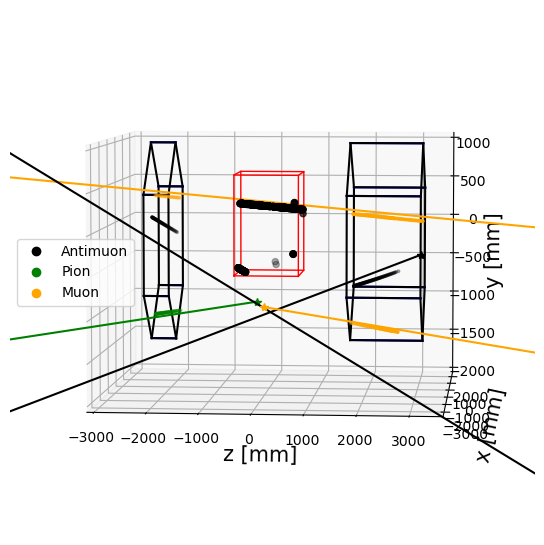

In [476]:
Mx2Hits = Mx2Data("MiniRun5_1E19_RHC.minerva.0000087.dst.root")
NdFlow = NdData("MiniRun4.5_1E19_RHC.flow.0000087.FLOW.hdf5")
fig = plt.figure(figsize=(15, 15))

master_i=49

i = master_i
j = 0
#az
view_event(Mx2Hits, i, 0, NdFlow)

plt.show()
fig.savefig("Mx2_tracks_2x2_entry"+str(i)+".png")

#MINERvA --> edepsim id # for shared numbers

bt [14056 14057 14058 14059     0     0     0     0     0     0]
hits 23.8515625


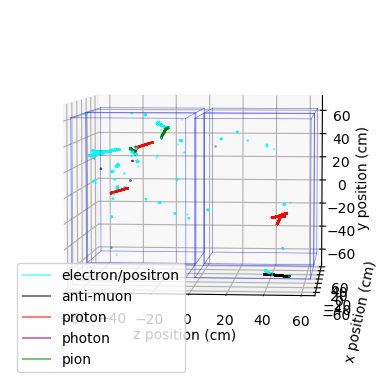

pdg_exotic:  [1000140280, 1000020040, 1000020040, 1000140280, 1000020040, 1000020040, 1000140280, 1000020040, 1000020040, 1000140280, 1000020040, 1000020040, 1000140280, 1000020040, 1000020040, 1000140280, 1000020040, 1000020040, 1000170370, 2112, 1000170350, 1000180400, 1000170370, 2112, 1000170350, 1000180400, 1000170370, 1000170370, 2112, 1000170350, 1000180400, 1000170370, 2112, 1000170350, 1000180400, 1000170370, 1000170370, 1000170370, 1000170350, 1000180400, 1000170390, 1000150330, 1000150330, 1000150330]


In [436]:
def draw_event_bt(NdFlow,event_number):
    hit_ref_slice = NdFlow.match_region[event_number]
    #print(hit_ref_slice[0])
    hits = NdFlow.data[hit_ref_slice[0]:hit_ref_slice[1]]
    hits_bt = NdFlow.backtracked_hits[hit_ref_slice[0]:hit_ref_slice[1]]
    segments = NdFlow.segments
    
    #print('event', event_number,':', 'number of','=',len(hits))
    print("bt", hits_bt[1]["segment_id"])
    print("hits", hits['Q'][1])
    pdg_exotic=[]
    #print(hits.dtype)
    #print(hits[1]['Q'])
    #print(hits_bt[1]['fraction'])
    # plot al hits from this event in z-y:
    #plt.scatter(hits['z'],hits['x'],c='b',alpha=1.0,s=1.2)
    traj_id = NdFlow.true_traj[NdFlow.true_traj.fields("event_id") == segments['event_id'][0]]
    traj_evtid = traj_id["vertex_id"]
    #print(len(traj_evtid),len(hits_bt))
    #print(np.unique(traj_evtid))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    labels = {
        13: 'muon',
        -13: 'anti-muon',
        11: 'electron/positron',
        -11: 'electron/positron',
        2212: 'proton',
        211: 'pion',
        -211: 'pion',
        111: 'pion',
        22: 'photon',
        1000180370: 'argon'
    }
    
    colors = {
        13: 'orange',
        -13: 'black',
        11: 'cyan',
        -11: 'cyan',
        2212: 'red',
        211: 'green',
        -211: 'green',
        111: 'green',
        22: 'purple',
        1000180370: 'grey'
    }
    
    lines = []
    line_labels = []

    for hit in hits_bt:
        for cont in range(len(hit['fraction'])):
            if abs(hit['fraction'][cont]) > 0.0001:
                seg_id = hit['segment_id'][cont]
                seg = segments[seg_id]
                traj_evtid = segments["traj_id"]

                if not seg['segment_id'] == seg_id:
                    print('WARNING: segment id not the same as segment index!')
                
                trajectory_parent_id = NdFlow.true_traj.fields('parent_id')
                
                if traj_evtid[cont] == 872000094:
                    line, = ax.plot([seg['z_start'], seg['z_end']], [seg['x_start'], seg['x_end']], [seg['y_start'], seg['y_end']], c='r', alpha=0.5)
                    lines.append(line)
                    line_labels.append('872000094')

                pdg_id = seg['pdg_id']
                if pdg_id in labels:
                    color = colors[pdg_id]
                    line, = ax.plot([seg['z_start'], seg['z_end']], [seg['x_start'], seg['x_end']], [seg['y_start'], seg['y_end']], c=color, alpha=0.5)
                    if labels[pdg_id] not in line_labels:
                        lines.append(line)
                        line_labels.append(labels[pdg_id])
                else:
                    pdg_exotic.append(pdg_id)
                    if traj_evtid[cont] == 1000000872010592:
                        line, = ax.plot([seg['z_start'], seg['z_end']], [seg['x_start'], seg['x_end']], [seg['y_start'], seg['y_end']], c='m', alpha=0.5)
                        lines.append(line)
                        line_labels.append('1000000872010592')

    
    modules = np.array([[[  3.069,  63.931],
                       [-62.076,  62.076],
                       [  2.462,  64.538]],

                      [[  3.069,  63.931],
                       [-62.076,  62.076],
                       [-64.538,  -2.462]],

                      [[-63.931,  -3.069],
                       [-62.076,  62.076],
                       [  2.462,  64.538]],

                      [[-63.931,  -3.069],
                       [-62.076,  62.076],
                       [-64.538,  -2.462]]])
    
    for module in modules:
        for i in range(2):
            for j in range(2):
                ax.plot([module[0][i], module[0][i]], [module[1][0], module[1][1]], [module[2][j], module[2][j]], 'b', alpha=0.5, linewidth=0.5)
                ax.plot([module[0][i], module[0][i]], [module[1][j], module[1][j]], [module[2][0], module[2][1]], 'b', alpha=0.5, linewidth=0.5)
                ax.plot([module[0][0], module[0][1]], [module[1][i], module[1][i]], [module[2][j], module[2][j]], 'b', alpha=0.5, linewidth=0.5)
                
    ax.view_init(elev=5,azim=275,vertical_axis='y')
    ax.set_xlabel("x position (cm)")
    ax.set_ylabel("y position (cm)")
    ax.set_zlabel("z position (cm)")
    ax.legend(lines, line_labels)
    plt.show()
    
    return pdg_exotic



pdg_exotic_temp=draw_event_bt(NdFlow,master_i)
print("pdg_exotic: ", pdg_exotic_temp)

In [306]:
def hit_trackdown(NdFlow,event_number, Mx2Hits):
    hit_ref_slice = NdFlow.match_region[event_number]
    #print(hit_ref_slice[0])
    hits = NdFlow.data[hit_ref_slice[0]:hit_ref_slice[1]]
    hits_bt = NdFlow.backtracked_hits[hit_ref_slice[0]:hit_ref_slice[1]]
    segments = NdFlow.segments
    
    #for i in range(len(hits_bt)):
        #for cont in range(len(hits_bt[i]['fraction'])):
            #print("HIT",hit['fraction'][cont])
            #if abs(hits_bt[i]['fraction'][cont]) > 0.0001:
                #seg_id = hits_bt[i]['segment_id'][cont]
                #seg = segments[seg_id]
                #traj_evtid = segments["traj_id"]

                #print("segment: ", seg['x_start'], seg['x'], seg['x_end'])
                #print("hit: ", hits[i]['x'])
                        
    #Get the backtracked hits using the indices
    backtracked_hits = NdFlow.backtracked_hits.fields("segment_id")[hit_ref_slice[0]:hit_ref_slice[1]]
    backtracked_hits_frac = NdFlow.backtracked_hits.fields("fraction")[hit_ref_slice[0]:hit_ref_slice[1]]
    # Get the segment ids with fraction != 0, because only non-0 fractions contribute to the event
    segment_ids = np.unique(backtracked_hits[backtracked_hits_frac != 0]) #[backtracked_hit_frac !=0]
    #Get the segments by putting a condition on the segment ids we retrieved above and you can see that all of them have the same 'event_id' (This is the mc truth event id, not the id in charge events)
    segments = NdFlow.segments[segment_ids]

    #print(segments['event_id'])
    #Now get the trajectories using the event id above
    trajectories = NdFlow.true_traj[NdFlow.true_traj.fields("event_id") == segments['event_id'][0]]
    
    vertex_ids_2x2=np.unique(trajectories['vertex_id'])
    
    #print("2x2 event id: ", np.unique(trajectories['event_id']))
    #print("2x2 vertex ids: ", np.unique(trajectories['vertex_id']))
    
    mnv_trck_ids=[]
    
    for idx in Mx2Hits.trk_index[event_number]:
        
        n_nodes = Mx2Hits.trk_nodes[event_number][idx]
        # print(n_nodes)
        if ((n_nodes >0)):
            # print( "t", Mx2Hits.trk_node_Z[event_number][idx][0])    

            #placeholders for the track_ids to consider for the track
            mc_Mx2_truth={}
            mc_Mx2_truth["track_id"] = []
            mc_Mx2_truth["traj_x"] = []
            mc_Mx2_truth["traj_y"] = []
            mc_Mx2_truth["traj_z"] = []

            trk_time_slice = (Mx2Hits.trk_time_slice[event_number]) 

            #if (trk_time_slice[idx] !=slice and slice >0): #Only consider tracks that are in the time slice we want to study
            #    continue

            clus_id_z = (Mx2Hits.clus_id_z[event_number])

            cl_list = Mx2Hits.trk_node_cluster_idx[event_number][idx] # select the clusters associated with the nodes of the track
            cl_list = cl_list[cl_list>=0]
            clus_z = clus_id_z[cl_list]  #  select the Z positions of the clusters associated with the nodes of the track
            cl_size = Mx2Hits.clus_id_size[event_number][cl_list] # Number of digits that were clustered for each of those clusters
            hit_list = Mx2Hits.clus_id_hits_idx[event_number][cl_list] # Lists of digits that were clustered for each of those clusters

            hit_list = hit_list[hit_list>=0]

            hit_energy_list = Mx2Hits.mc_id_mchit_dE[event_number][hit_list] # Energy deposited
            nhits = Mx2Hits.mc_id_nmchit[event_number][hit_list]
            nhits = np.where(nhits>2,2,nhits) # Each digits is connsidered to be at most 2 true MC hits

            traj_list = np.concatenate([Mx2Hits.mc_id_mchit_trkid[event_number][hit_list][i][:nhits[i]] for i in range(len(nhits))]) # Get the list of all trajectories that contributed to the track.
            # traj_list = Mx2Hits.mc_id_mchit_trkid[event_number][hit_list][:,0]

            # Getting the trajectories that contributed
            traj_list = traj_list[traj_list>0]
            hit_energy_list = hit_energy_list[hit_energy_list>0]
            particle_energy = {}
            for i in range(len(traj_list)):
                particle_id = traj_list[i]
                energy = hit_energy_list[i]
                if particle_id in particle_energy:
                    particle_energy[particle_id] += energy
                else:
                    particle_energy[particle_id] = energy
            if len(particle_energy) == 0:
                continue
            max_energy_particle_id = max(particle_energy, key=particle_energy.get)
            edep_traj_name = Mx2Hits.mc_traj_edepsim_trkid[event_number][max_energy_particle_id]
            edep_traj_evtid = Mx2Hits.mc_traj_edepsim_eventid[event_number][max_energy_particle_id]
            mc_traj_trkid = Mx2Hits.mc_traj_trkid[event_number][max_energy_particle_id]
            mnv_trck_ids.append(edep_traj_evtid)
            
    #print("minerva vertex ids: ",mnv_trck_ids)
    return mnv_trck_ids, vertex_ids_2x2


for i in range(127):
    mnv_trck_ids, vertex_ids_2x2 = hit_trackdown(NdFlow,i, Mx2Hits)
    if i==0:
        mnv_trck_ids_final=mnv_trck_ids
    for index in range(len(mnv_trck_ids)):
        for index2 in range(len(vertex_ids_2x2)):
            try: 
                #print("minerv ids: ", mnv_trck_ids)
                #print("2x2 ids: ", vertex_ids_2x2)
                if mnv_trck_ids_final[index]==vertex_ids_2x2[index2]:
                    print("i: ", i)
            except IndexError:
                continue


i:  0
i:  0


In [ ]:
x_start=[]
x_end=[]
y_start=[]
y_end=[]
z_start=[]
z_end=[]
dist_seg=[]
traj_seg_id=[]
vert_seg_id=[]
x=[]
y=[]
z=[]
event_seg_id=[]

traj_start=[]
traj_end=[]
traj_true_id=[]
vert_true_id=[]
event_true_id=[]

hits=[]

dist=[]
dist_in=[]
dist_out=[]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

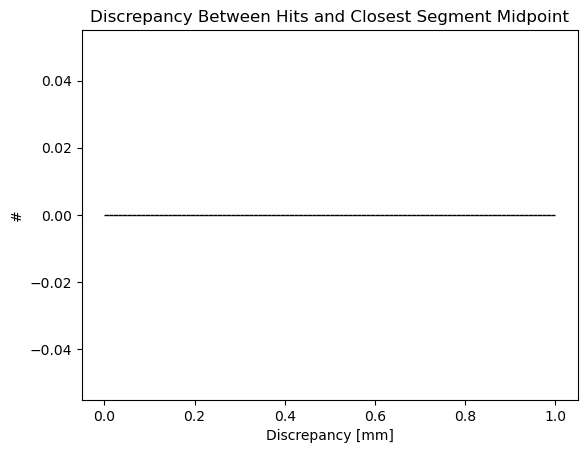

In [26]:
def distance_comparison_2x2(NdFlow,entry,ax=None):
    
    hit_ref_slice = NdFlow.match_region[entry]
    hits = NdFlow.data[hit_ref_slice[0]:hit_ref_slice[1]]
    
    x_nd = NdFlow.data.fields("x")[NdFlow.nd_trigger==entry]*10
    y_nd = NdFlow.data.fields("y")[NdFlow.nd_trigger==entry]*10
    z_nd = NdFlow.data.fields("z")[NdFlow.nd_trigger==entry]*10
    
    print(NdFlow.data.fields("id")[NdFlow.nd_trigger==entry])
    
    Q_nd = NdFlow.data.fields("Q")[NdFlow.nd_trigger==entry]
    time = NdFlow.data.fields("ts_pps")[NdFlow.nd_trigger==entry]/10 - 1.2e6 * NdFlow.nd_trigger[NdFlow.nd_trigger==entry]
    mask1 = (time<10e3)
    mask2 = (time>10e3)
    #print(x_nd[mask2])
    #print(y_nd)
    #print(z_nd)
    
    points = ax.scatter(x_nd[mask1], y_nd[mask1], z_nd[mask1], c=Q_nd[mask1], cmap='plasma')
    points2 = ax.scatter(x_nd[mask2], y_nd[mask2], z_nd[mask2], c=Q_nd[mask2],cmap='bone')
    
    mc_2x2_truth = {
    'segment_ids': [],
    'trajectory_ids': [],
    }
    
    NdFlow.event_hit_indices[entry]
    traj = NdFlow.true_traj[entry]
    #print("traj: ", traj)
    traj_nd = NdFlow.true_traj.fields("traj_id")[entry]
    #print("traj_nd: ", traj_nd)
    vertex_nd = NdFlow.true_traj.fields("vertex_id")[entry]
    event_nd = NdFlow.true_traj.fields("event_id")[entry]
    #print(traj.dtype.names)
    
    trajectory_id = NdFlow.true_traj.fields("file_traj_id")[entry]
    trajectory_parent_id = NdFlow.true_traj.fields("parent_id")[entry]
    
    #We then get the start and stop indices for the hits corresponding to the event
    
    hit_start_index = NdFlow.event_hit_indices.fields("start")[entry]
    hit_stop_index = NdFlow.event_hit_indices.fields("stop")[entry]
    #print("hit index: ", hit_start_index, " ", hit_stop_index)
    #Get the backtracked hits using the indices
    backtracked_hits = NdFlow.backtracked_hits.fields("segment_id")[hit_start_index:hit_stop_index]
    backtracked_hits_frac = NdFlow.backtracked_hits.fields("fraction")[hit_start_index:hit_stop_index]
    for i in range(10):
        print("backtracked_hits: ", backtracked_hits[i])
    # Get the segment ids with fraction != 0, because only non-0 fractions contribute to the event
    segment_ids = np.unique(backtracked_hits[backtracked_hits_frac != 0]) #[backtracked_hit_frac !=0]
    #Get the segments by putting a condition on the segment ids we retrieved above and you can see that all of them have the same 'event_id' (This is the mc truth event id, not the id in charge events)
    segments = NdFlow.segments[segment_ids]
    #print("segments['event_id']: ", segments['event_id'])
    #Now get the trajectories using the event id above
    #trajectories = NdFlow.true_traj[NdFlow.true_traj.fields("event_id") == segments['event_id'][0]]
    index=0
    dist_hit_seg=[]
    hit_dif=[]
    

    
    while True:
        try:
            # Attempt to access the element at the current index
            
            #break
            index2=0
            hit=x_nd[index],y_nd[index],z_nd[index]
            if index!=0:
                hit1=x_nd[index-1],y_nd[index-1],z_nd[index-1]
                
                #hit_dif.append(distance_between_points(hit1,hit))
                
            #min_seg_dist=100000
            #while True:
                #try:
                    #segment_midpoint=(segments['x'][index2]*10), (segments['y'][index2]*10), (segments['z'][index2]*10)
                    #if distance_between_points(hit,segment_midpoint)<min_seg_dist:
                        #min_seg_dist=distance_between_points(hit,segment_midpoint)
                    #index2 += 1
                #except IndexError:
                    #break
                
            #dist_hit_seg.append(min_seg_dist)
                    
            #x_start.append(NdFlow.segments.fields("x_start")[index])
            #x_end.append(NdFlow.segments.fields("x_end")[index])
            #y_start.append(NdFlow.segments.fields("y_start")[index])
            #y_end.append(NdFlow.segments.fields("y_end")[index])
            #z_start.append(NdFlow.segments.fields("z_start")[index])
            #z_end.append(NdFlow.segments.fields("z_end")[index])
            #x.append(NdFlow.segments.fields("x")[index])
            #y.append(NdFlow.segments.fields("y")[index])
            #z.append(NdFlow.segments.fields("z")[index])
            
            #traj_start.append(NdFlow.true_traj.fields("xyz_start")[index])
            #traj_end.append(NdFlow.true_traj.fields("xyz_end")[index])
            #vert_true_id.append(NdFlow.true_traj.fields("vertex_id")[index])
            #traj_true_id.append(NdFlow.true_traj.fields("traj_id")[index])
            #event_true_id.append(NdFlow.true_traj.fields("event_id")[index])
            
            index += 1  # Increment the index
        except IndexError:
            # When IndexError is caught, break the loop
            break
    #print(hit_dif)
    
    #for i in range(10):
        #print(event_true_id[i], event_seg_id[i], vert_true_id[i], vert_seg_id[i], true_traj_id[i], traj_seg_id[i])
       # if (vert_true_id[index]==vert_seg_id[index]) and (true_traj_id[index] == traj_seg_id[index]) and (event_true_id[index] == event_seg_id[index]):
          #  print("True")
       # else:
           # print("False")
            
    #print("dist: ", dist)
    #print(traj_end[0])
    #print(x_end[0],y_end[0],z_end[0])
    #print(len(x_start))
    #print(len(x_end))
    
    #for i in range(len(x_start)):
        #dist_seg.append(np.sqrt((x_end[i] - x_start[i])**2 + (y_end[i] - y_start[i])**2 + (z_end[i] - z_start[i])**2))
    
    return(dist_hit_seg)
    
    #print()
    #print("trajectories: ", trajectories)
    #print()
    #print(np.unique(trajectories['vertex_id']))

#self.data = self.flow_file['charge']['calib_prompt_hits']['data']
#self.nd_trigger = (self.data.fields("ts_pps")[:]/10/1.2e6).astype(int) 
#self.true_traj = self.flow_file['mc_truth']['trajectories']['data']
#self.backtracked_hits = self.flow_file['mc_truth']['calib_prompt_hit_backtrack']['data']
#self.segments = self.flow_file['mc_truth']['segments']['data']
#self.events = self.flow_file['charge']['events']['data']
#self.event_hit_indices = self.flow_file['charge']['events']['ref']['charge']['calib_prompt_hits']['ref_region']    

ax1 = fig.add_subplot(211, projection='3d')
dist_seg_hit_temp=[]
dist_seg_hit_final=[]
bad_events=0
for i in range(1):
    try:
        dist_seg_hit_temp = distance_comparison_2x2(NdFlow, i, ax1)
        #for i in range(len(dist_seg_hit_temp)):
            #dist_seg_hit_final.append(dist_seg_hit_temp[i])
    except IndexError:
        bad_events+=1
        continue

print("bad events: ", bad_events)
        
plt.hist(dist_seg_hit_final, bins=100, edgecolor='black')
plt.title('Discrepancy Between Hits and Closest Segment Midpoint')
plt.xlabel('Discrepancy [mm]')
plt.ylabel('#')
plt.show()
    
#for i in range(len(dist_seg)):
    #dist_seg[i]=dist_seg[i]*10

In [333]:
print(len(dist))

for index in range(len(vert_true_id)):
    for index2 in range(len(vert_seg_id)):
        if (vert_true_id[index]==vert_seg_id[index2]) and (traj_true_id[index] == traj_seg_id[index2]) and (event_true_id[index] == event_seg_id[index2]):
            node=[x[index2],y[index2],z[index2]]
            #print("Event true id: ", event_true_id[index], "Event seg id: ", event_seg_id[index2], "Vert true id: ", vert_true_id[index], "Vert seg id: ", vert_seg_id[index2], "True traj id: ", traj_true_id[index], "Traj seg id: ", traj_seg_id[index2])
            #print("node: ", node, "True start: ", traj_start[index], "True end: ", traj_end[index])
           # print("Index: ", index, "Index2: ", index2)
            dist.append(distance_from_node_to_true(node, traj_start[index],traj_end[index]))


            #NEEDS CORRECT UNITS
            if point_location_2x2(traj_start[index])==1:
                dist_in.append(distance_from_node_to_true(node, traj_start[index],traj_end[index]))
            elif point_location_2x2(traj_start[index])==0:
                dist_out.append(distance_from_node_to_true(node, traj_start[index],traj_end[index]))
            else:
                print("Something is wrong")
            #print("Distance: ", distance_from_node_to_true(node, traj_start[index],traj_end[index]))
            #print()
            #print()
            break
        else:
            continue

#plt.hist(dist_seg, bins=100, edgecolor='black')
#plt.yscale('log')
#plt.title('Segment Lengths')
#plt.xlabel('Length of Segment [mm]')
#plt.ylabel('# of Segments')
#plt.show()
    
    
    
# Create a histogram
plt.hist(dist, bins=100, edgecolor='black')

plt.yscale('log')
plt.title('Discrepancy Between Segment Midpoints and True Trajectories 2x2')
plt.xlabel('Discrepancy [mm]')
plt.ylabel('#')

# Show the plot
plt.show()

# Create a histogram
plt.hist(dist_in, bins=100, edgecolor='black')

plt.yscale('log')
plt.title('Discrepancy Between Segment Midpoints and True Trajectories (In 2x2 Detector)')
plt.xlabel('Discrepancy [mm]')
plt.ylabel('#')

# Show the plot
plt.show()

# Create a histogram
plt.hist(dist_out, bins=100, edgecolor='black')

plt.yscale('log')

plt.title('Discrepancy Between Segment Midpoints and True Trajectories (Outside of 2x2 Detector)')
plt.xlabel('Discrepancy [mm]')
plt.ylabel('#')

# Show the plot
plt.show()

NameError: name 'dist' is not defined

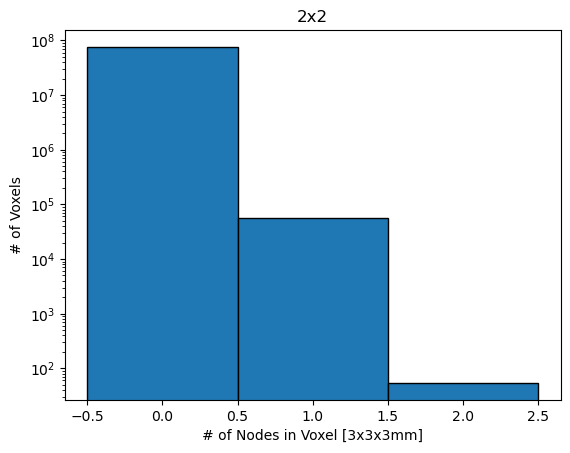

In [265]:
# Calculate dimensions

x_min=-639.31, 
x_max=639.31, 
y_min=-620.76, 
y_max=620.76, 
z_min=-645.38, 
z_max=645.38 

dim_x_2x2 = int(math.ceil(1278.62 / 3))
dim_y_2x2 = int(math.ceil(1241.52 / 3))
dim_z_2x2 = int(math.ceil(1290.76 / 3))

voxels_2x2 = np.zeros((dim_x_2x2, dim_y_2x2, dim_z_2x2), dtype=int)

for i in range(192):
    entry=i
    # Initialize 3D arrays


    x_nd = NdFlow.data.fields("x")[NdFlow.nd_trigger==entry]*10
    y_nd = NdFlow.data.fields("y")[NdFlow.nd_trigger==entry]*10
    z_nd = NdFlow.data.fields("z")[NdFlow.nd_trigger==entry]*10

    #ds 1, us 0
    index=0

    while True:
        try:
            x_vox=int(math.ceil(((x_nd[index] + 639.31) / 3)))
            y_vox=int(math.ceil(((y_nd[index] + 620.76) / 3)))
            z_vox=int(math.ceil(((z_nd[index] + 645.38) / 3)))
            voxels_2x2[x_vox][y_vox][z_vox]+=1
            #print("current voxel: ", voxels_ds[x_vox][y_vox][z_vox])
            index+=1
        except IndexError:
            break

flattened_voxels_2x2 = voxels_2x2.flatten()


bin_edges = np.arange(min(flattened_voxels_2x2), max(flattened_voxels_2x2) + 2) - 0.5

plt.hist(flattened_voxels_2x2, bins=bin_edges, edgecolor='black')
plt.yscale('log')
plt.title('2x2')
plt.xlabel('# of Nodes in Voxel [3x3x3mm]')
plt.ylabel('# of Voxels')
plt.show()



In [495]:
def distance_from_node_to_true(node, true_start, true_end):
    # Vector AB
    AB = np.array([true_end[0] - true_start[0], true_end[1] - true_start[1], true_end[2] - true_start[2]])
    # Vector AP
    AP = np.array([node[0] - true_start[0], node[1] - true_start[1], node[2] - true_start[2]])
    # Cross product AP x AB
    cross_product = np.cross(AP, AB)
    # Magnitude of the cross product
    cross_product_magnitude = np.linalg.norm(cross_product)
    # Magnitude of the direction vector AB
    AB_magnitude = np.linalg.norm(AB)
    # Distance from point to line
    distance = cross_product_magnitude / AB_magnitude
    return distance

def flatten_list(nested_list):
    return list(itertools.chain.from_iterable(nested_list))

def closest_point_on_line(P, A, B):

    P = np.array(P)
    A = np.array(A)
    B = np.array(B)
    AB = B - A
    AP = P - A
    AB_sq = np.dot(AB, AB)
    t = np.dot(AP, AB) / AB_sq
    
    if t < 0:
        closest_point = A
    elif t > 1:
        closest_point = B
    else:
        closest_point = A + (t * AB)

    return closest_point

def chi2_by_component(node, true_start, true_end):
    expected_value=closest_point_on_line(node, true_start, true_end)
    chix=((node[0] - expected_value[0])**2)/expected_value[0]
    chiy=((node[1] - expected_value[1])**2)/expected_value[1]
    chiz=((node[2] - expected_value[2])**2)/expected_value[2]
    chi = chix+chiy+chiz
    return(chi)

def point_location_mnv(point):
    shape_point=[point[0],point[1]]
    shape_point=Point(point)
    z_min_ds, z_max_ds = 1640, 3100
    z_min_us, z_max_us = -2400, -1900
    x_min, x_max = -1080, 1080
    y_min, y_max = -1450, 1000
    
    polygon = Polygon([(0, -1450), (1080, -850), (1080, 400), (0, 1000), (-1080,400),(-1080,-850)])
    #in
    if (z_min_ds <= point[2] <= z_max_ds) or (z_min_us <= point[2] <= z_max_us) and (polygon.contains(shape_point)==True):
        return 1 
    #between
    elif (z_max_us <= point[2] <= z_min_ds) and (-2000 <= point[1] <= 1000) and (-1100 <= point[0] <= 1100):
        return 2
    #out
    else:
        return 0

def distance_between_points(point1,point2):
    return np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 + (point2[2] - point1[2])**2)
    
def point_location_2x2(point):

    x_min=-639.31, 
    x_max=639.31, 
    y_min=-620.76, 
    y_max=620.76, 
    z_min=-645.38, 
    z_max=645.38

    if (z_min <= point[2] <= z_max) and (x_min <= point[0] <= x_max) and (y_min <= point[1] <= y_max):
        return 1
    else:
        return 0

def point_location(point):
    shape_point=[point[0],point[1]]
    shape_point=Point(point)
    z_min_ds, z_max_ds = 1640, 3100
    z_min_us, z_max_us = -2400, -1900
    
    x_min=-639.31, 
    x_max=639.31, 
    y_min=-620.76,
    y_max=620.76,
    z_min=-645.38, 
    z_max=645.38
    
    polygon = Polygon([(0, -1450), (1080, -850), (1080, 400), (0, 1000), (-1080,400),(-1080,-850)])
    #in ds
    if (z_min_ds <= point[2] <= z_max_ds) and (polygon.contains(shape_point)==True):
        return 1
    #in us
    elif (z_min_us <= point[2] <= z_max_us) and (polygon.contains(shape_point)==True):
        return 2
    #in 2x2
    elif (z_max_us <= point[2] <= z_min_ds) and (-2000 <= point[1] <= 1000) and (-1100 <= point[0] <= 1100):
        return 3
    elif (z_min <= point[2] <= z_max) and (x_min <= point[0] <= x_max) and (y_min <= point[1] <= y_max):
        return 4
    #out
    else:
        return 0
    
def distance_comparison(entry, Mx2Hits, min_pe=0):
    
    offsetX = Mx2Hits.offsetX[entry]
    offsetY = Mx2Hits.offsetY[entry]
    offsetZ = Mx2Hits.offsetZ[entry]
    
    #Nodes, including 1: xyz position 2: Charge 3: Time 4: Event ID 5: Vertex ID 6: US vs DS 7: MNV Vertex ID
    
    distances=[] 
    inCheck=[]
    particle_places=[0,0,0]
    index_tracker=[]
    idx_counter=0
    dist_by_track=[]
    inCheck_by_track=[]
    min_dist=[]
    max_dist=[]
    node_dif_us=[]
    node_dif_ds=[]
    
    charge=[]
    nodes_xyz=[]
    time=[]
    vertexID=[]
    detector_index=[]
    Us_Ds=[]
    pdg=[]
    train_idx=[]
    train_idx_count=0
    
    particle_count=[0,0,0,0,0,0]
    
    for idx in Mx2Hits.trk_index[entry]:
        #print("Mx2hits idx: ", Mx2Hits.trk_index[entry])
        n_nodes = Mx2Hits.trk_nodes[entry][idx]
        # print(n_nodes)
        if ((n_nodes >0)):
            # print( "t", Mx2Hits.trk_node_Z[entry][idx][0])
            
            
            temp_min=1000000
            temp_max=0
            
            x_nodes = Mx2Hits.trk_node_X[entry][idx][:n_nodes] - offsetX
            y_nodes = Mx2Hits.trk_node_Y[entry][idx][:n_nodes] - offsetY
            z_nodes = Mx2Hits.trk_node_Z[entry][idx][:n_nodes] - offsetZ
            q_nodes = Mx2Hits.trk_node_qOverP[entry][idx][:n_nodes]
            
            #selecting all the MC trajectories of the spill
            traj_x = Mx2Hits.mc_traj_point_x[entry] #each entry is one trajectory 
            traj_y = Mx2Hits.mc_traj_point_y[entry]
            traj_z = Mx2Hits.mc_traj_point_z[entry]

            #placeholders for the track_ids to consider for the track
            mc_Mx2_truth={}
            mc_Mx2_truth["track_id"] = []
            mc_Mx2_truth["traj_x"] = []
            mc_Mx2_truth["traj_y"] = []
            mc_Mx2_truth["traj_z"] = []

            trk_time_slice = (Mx2Hits.trk_time_slice[entry]) 

            #if (trk_time_slice[idx] !=slice and slice >0): #Only consider tracks that are in the time slice we want to study
            #    continue

            clus_id_z = (Mx2Hits.clus_id_z[entry])

            cl_list = Mx2Hits.trk_node_cluster_idx[entry][idx] # select the clusters associated with the nodes of the track
            cl_list = cl_list[cl_list>=0]
            clus_z = clus_id_z[cl_list]  #  select the Z positions of the clusters associated with the nodes of the track
            cl_size = Mx2Hits.clus_id_size[entry][cl_list] # Number of digits that were clustered for each of those clusters
            hit_list = Mx2Hits.clus_id_hits_idx[entry][cl_list] # Lists of digits that were clustered for each of those clusters

            hit_list = hit_list[hit_list>=0]

            hit_energy_list = Mx2Hits.mc_id_mchit_dE[entry][hit_list] # Energy deposited
            nhits = Mx2Hits.mc_id_nmchit[entry][hit_list]
            nhits = np.where(nhits>2,2,nhits) # Each digits is connsidered to be at most 2 true MC hits

            traj_list = np.concatenate([Mx2Hits.mc_id_mchit_trkid[entry][hit_list][i][:nhits[i]] for i in range(len(nhits))]) # Get the list of all trajectories that contributed to the track.
            # traj_list = Mx2Hits.mc_id_mchit_trkid[entry][hit_list][:,0]

            # Getting the trajectories that contributed
            traj_list = traj_list[traj_list>0]
            hit_energy_list = hit_energy_list[hit_energy_list>0]
            particle_energy = {}
            for i in range(len(traj_list)):
                particle_id = traj_list[i]
                energy = hit_energy_list[i]
                if particle_id in particle_energy:
                    particle_energy[particle_id] += energy
                else:
                    particle_energy[particle_id] = energy
            if len(particle_energy) == 0:
                continue
            max_energy_particle_id = max(particle_energy, key=particle_energy.get)
            edep_traj_name = Mx2Hits.mc_traj_edepsim_trkid[entry][max_energy_particle_id]
            edep_traj_evtid = Mx2Hits.mc_traj_edepsim_eventid[entry][max_energy_particle_id]
            mc_traj_trkid = Mx2Hits.mc_traj_trkid[entry][max_energy_particle_id]
            
            # Getting the Start and End position of the trajectory that contributed the most to the track.
            x_traj = [traj_x[max_energy_particle_id][0], traj_x[max_energy_particle_id][1]]
            y_traj = [traj_y[max_energy_particle_id][0], traj_y[max_energy_particle_id][1]]
            z_traj = [traj_z[max_energy_particle_id][0], traj_z[max_energy_particle_id][1]]
            
            x_traj = np.array(x_traj) - offsetX
            y_traj = np.array(y_traj) - offsetY
            z_traj = np.array(z_traj) - offsetZ
            
            mc_Mx2_truth["track_id"] = np.ones(len(x_traj))*edep_traj_name
            mc_Mx2_truth["traj_x"] = x_traj
            mc_Mx2_truth["traj_y"] = y_traj
            mc_Mx2_truth["traj_z"] = z_traj
            
            #print("Number of nodes: ", n_nodes)
            #print("current idx: ", idx)
            
            start_traj=[x_traj[0], y_traj[0], z_traj[0]]
            end_traj=[x_traj[1], y_traj[1], z_traj[1]]
            
            #electron/positron
            if (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==11) or (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==-11):
                particle_count[0]+=1
                #print(entry)
            #muon
            elif (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==13):
                particle_count[1]+=1
            #antimuon
            elif (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==-13):
                particle_count[2]+=1
            #pion
            elif (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==111) or (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==211) or (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==-211):
                particle_count[3]+=1
            #proton
            elif (Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id]==2212):
                particle_count[4]+=1
            #everything else
            else:
                particle_count[5]+=1
            
            #print("idx: ", idx)
            #print("ds idx: ", ds_track_count)
            #print("us idx: ", us_track_count)
            time_true=Mx2Hits.mc_traj_point_t[entry][max_energy_particle_id]
            print("Time: ", time_true)
            #print("idx: ", idx)
            
            
            dist_particle=[]
            for i in range(n_nodes):
                
                nodes=[x_nodes[i], y_nodes[i], z_nodes[i]]
                nodes2=[x_nodes[i-1], y_nodes[i-1], z_nodes[i-1]]
                if i != 0:
                    if (-2400<nodes[2]) and (nodes[2]<-1900) and (-2400<nodes2[2]) and (nodes2[2]<-1900):
                        node_dif_us.append(distance_between_points(nodes,nodes2))
                    elif (1640<nodes[2]) and (nodes[2]<3100) and (1640<nodes2[2]) and (nodes2[2]<3100):
                        node_dif_ds.append(distance_between_points(nodes,nodes2))
                #print(distance_from_node_to_true(nodes, start_traj, end_traj))
                dist_particle.append(distance_from_node_to_true(nodes, start_traj, end_traj))
                if distance_from_node_to_true(nodes, start_traj, end_traj) < temp_min:
                    temp_min=distance_from_node_to_true(nodes, start_traj, end_traj)
                if distance_from_node_to_true(nodes, start_traj, end_traj) > temp_max:
                    temp_max=distance_from_node_to_true(nodes, start_traj, end_traj)
                inCheck.append(point_location_mnv(nodes))
                index_tracker.append(idx+1)
                
                #print(Mx2Hits.clus_id_time[trk_time_slice][0])
                
                charge.append(q_nodes[i])
                nodes_xyz.append(nodes)
                #print(nodes)
                vertexID.append(idx)
                time.append(trk_time_slice)
                
                pdg.append(Mx2Hits.mc_traj_pdg[entry][max_energy_particle_id])
                
                
                    
                
                if nodes[2]>0:
                    #downstream
                    Us_Ds.append(1)
                if nodes[2]<0:
                    #upstream
                    Us_Ds.append(0)
                
                if Us_Ds[i-1]!=Us_Ds[i]:
                    train_idx_count+=1
                    #if Us_Ds[i]==1:
                        #ds
                    #if Us_Ds[i]==0:
                        #us
                
                train_idx.append(train_idx_count)
                
                #print("Point location: ", point_location(nodes))
                
                #print("Us_Ds, us_track_count, us_idx, ds_track_count, ds_idx: ", Us_Ds[i], us_track_count, us_idx[-1], ds_track_count, ds_idx[-1])
                
            min_dist.append(temp_min)
            max_dist.append(temp_max)
            dist_by_track.append(dist_particle)
            #print("idx: ", idx)
            #if idx==0:
            #print(dist_particle)
            for i in range(len(dist_particle)):
                distances.append(dist_particle[i])
            #print("Distances: ")
            #print(distances)
            #print("Start Traj Coordinates: ", start_traj[0], start_traj[1],start_traj[2])
            point=[start_traj[0], start_traj[1],start_traj[2]]
            #point=(3000,3000,3000)
                
            in_detector_check=point_location_mnv(point)
            inCheck_by_track.append(in_detector_check)            
            #print("Check: ", in_detector_check)
            
            if in_detector_check==1:
                #plt.plot(dist_particle, color='green')
                particle_places[1]+=1
            elif in_detector_check==2:
                #plt.plot(dist_particle, color='blue')
                particle_places[2]+=1
            else: 
                #plt.plot(dist_particle, color='red')
                particle_places[0]+=1
            
            idx_counter=idx+1
                

            
    plt.xlabel('Node')
    plt.ylabel('Distance [mm]')
    plt.title('Distance Between Simulated Minerva Nodes and True Tracks')
    
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='Began inside mnv detector'),
                   Line2D([0], [0], color='r', lw=4, label='Began outside mnv detector'),
                   Line2D([0], [0], color='b', lw=4, label='Began between the mnv detectors')]
    
    
    #plt.legend(handles=legend_elements)
    #plt.show()
    
    #print(distances)
    #print()
    #print(inCheck)
    #print()
    #print("Particle places: ", particle_places)
    #print()
    #print("Index count: ", idx_counter)
    #print()
    #print("Index tracker: ", index_tracker)
    #print("distances: ", distances)
    #print()
    #print("inCheck: ", inCheck)
    
    return(distances, inCheck, particle_places, index_tracker, idx_counter, dist_by_track, inCheck_by_track, min_dist, max_dist, node_dif_us, node_dif_ds, charge, nodes_xyz, Us_Ds, time, vertexID, pdg, particle_count, train_idx)

#distance_comparison(i, Mx2Hits, 0)


Time:  [3493.43652344 6038.63232422  999.999       999.999       999.999     ]
Time:  [3702.21313477 6967.49804688  999.999       999.999       999.999     ]
Time:  [7290.16064453 8159.31445312  999.999       999.999       999.999     ]
Time:  [2383.14916992 2476.07421875  999.999       999.999       999.999     ]
Time:  [5952.25878906 6152.30322266  999.999       999.999       999.999     ]
Time:  [6910.31591797 7417.4140625   999.999       999.999       999.999     ]
Time:  [6910.31591797 6912.23583984  999.999       999.999       999.999     ]
Time:  [7879.24121094 7993.02880859  999.999       999.999       999.999     ]
Time:  [9255.25585938 9481.75683594  999.999       999.999       999.999     ]
Time:  [ 9749.75292969 10392.78613281   999.999        999.999
   999.999     ]
Time:  [6123.55322266 7264.24462891  999.999       999.999       999.999     ]
Time:  [8647.33496094 9017.43554688  999.999       999.999       999.999     ]
Time:  [8514.61230469 8836.55761719  999.999       

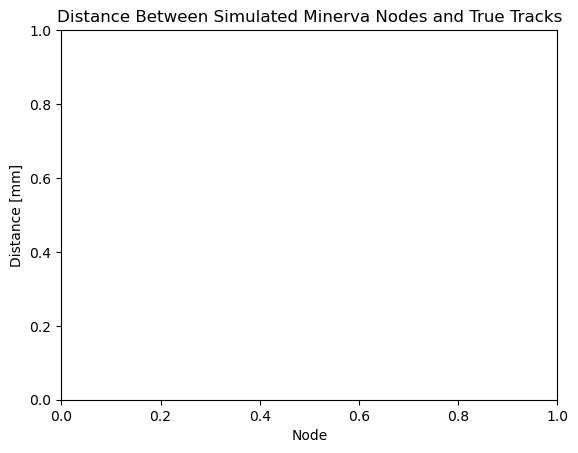

In [496]:
#The following code abides by the words of the great General Patton: 
#“A Good Plan, Violently Executed Now, Is Better Than a Perfect Plan Next Week."
#amen

distances_temp=[]
inCheck_temp=[]
particle_places_temp=[]
index_track_temp=[]
dist_by_track_temp=[]
inCheck_by_track_temp=[]
node_dif_us_temp=[]
node_dif_us_final=[]
node_dif_ds_temp=[]
node_dif_ds_final=[]

distances_final=[]
inCheck_final=[]
particle_places_final=[0,0,0]
index_track_final=[]
idx_count_final=0
dist_by_track_final=[]
inCheck_by_track_final=[]
traj_count=[]

min_dist_temp=[]
min_dist_final=[]
min_dist_in=[]
min_dist_out=[]
min_dist_btwn=[]

max_dist_temp=[]
max_dist_final=[]
max_dist_in=[]
max_dist_out=[]
max_dist_btwn=[]

betweenCount=0
inCount=0
outCount=0

in_distance_sum=0
out_distance_sum=0
between_distance_sum=0

avg_dist_in=[]
avg_dist_out=[]
avg_dist_btwn=[]

charge_temp=[]
nodes_xyz_temp=[]
Us_Ds_temp=[]
time_temp=[]
vertexID_temp=[]
pdg_temp=[]
train_idx_temp=[]

charge_final=[]
nodes_xyz_final=[]
Us_Ds_final=[]
time_final=[]
vertexID_final=[]
pdg_final=[]
train_idx_final=[]

eventID=[]

particle_count_temp=[0,0,0,0,0,0]
particle_count_final=[0,0,0,0,0,0]

for i in range(192):
    distances_temp,inCheck_temp, particle_places_temp, index_track_temp, idx_count_temp, dist_by_track_temp, inCheck_by_track_temp, min_dist_temp, max_dist_temp, node_dif_us_temp, node_dif_ds_temp, charge_temp, nodes_xyz_temp, Us_Ds_temp, time_temp, vertexID_temp, pdg_temp, particle_count_temp, train_idx_temp = distance_comparison(i, Mx2Hits, 0)
    dex=i
    
    for i in range(6):
        particle_count_final[i]+=particle_count_temp[i]
    
    #print(distances_final)
    #print("Maximum distance of all nodes in event: ", max_dist_temp)
    #print("Minimum distance of all nodes in event: ", min_dist_temp)
    
    #print(len(charge_temp))
    #print(len(nodes_xyz_temp))
    #print(len(Us_Ds_temp))
    #print(len(time_temp))
    #print(len(vertexID_temp))
    
    for i in range(len(charge_temp)):
        charge_final.append(charge_temp[i])
        nodes_xyz_final.append(nodes_xyz_temp[i])
        Us_Ds_final.append(Us_Ds_temp[i])
        time_final.append(time_temp[i])
        vertexID_final.append(vertexID_temp[i])
        eventID.append(dex)
        pdg_final.append(pdg_temp[i])
        train_idx_final.append(train_idx_temp[i])
    
    
    #print("Charge: ", charge_final)
    #print("nodes_xyz: ", nodes_xyz_final)
    #print("Us_Ds: ", Us_Ds_final)
    #print("time: ", time_final)
    #print("vertex id: ", vertexID_final)
    #print("event id: ", eventID)
    
    for i in range(len(dist_by_track_temp)):
        dist_by_track_final.append(dist_by_track_temp[i])
    
    for i in range(len(inCheck_by_track_temp)):
        inCheck_by_track_final.append(inCheck_by_track_temp[i])
    
    for i in range(len(min_dist_temp)):
        min_dist_final.append(min_dist_temp[i])
    
    for i in range(len(max_dist_temp)):
        max_dist_final.append(max_dist_temp[i])
    
    for i in range(len(node_dif_us_temp)):
        node_dif_us_final.append(node_dif_us_temp[i])
        
    for i in range(len(node_dif_ds_temp)):
        node_dif_ds_final.append(node_dif_ds_temp[i])
    
    idx_count_final+=idx_count_temp
    
    
    traj_count.append(idx_count_temp)
    
    for i in range(3):
        particle_places_final[i]+=particle_places_temp[i]
    if len(index_track_final) != 0:
        for i in range(len(index_track_temp)):
            index_track_temp[i]+=index_track_final[-1]
    for i in range(len(index_track_temp)):    
        index_track_final.append(index_track_temp[i])
        
    for i in range(len(distances_temp)):
        inCheck_final.append(inCheck_temp[i])
        if inCheck_temp[i]==1:
            in_distance_sum+=distances_temp[i]
            inCount+=1
        elif inCheck_temp[i]==0:
            out_distance_sum+=distances_temp[i]
            outCount+=1
        else:
            between_distance_sum+=distances_temp[i]
            betweenCount+=1



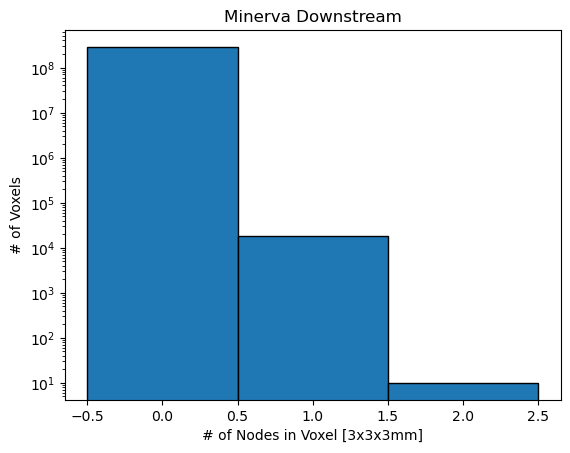

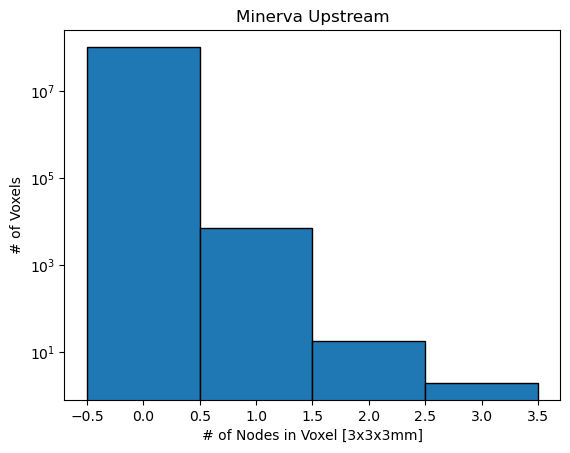

In [255]:

z_min_ds, z_max_ds = 1640, 3100
z_min_us, z_max_us = -2400, -1870
x_min, x_max = -1080, 1080
y_min, y_max = -1450, 1000

# Calculate dimensions
dim_x_ds = int(math.ceil(2160 / 3))
dim_y_ds = int(math.ceil(2450 / 3))
dim_z_ds = int(math.ceil(1460 / 3))

dim_x_us = int(math.ceil(2160 / 3))
dim_y_us = int(math.ceil(2450 / 3))
dim_z_us = int(math.ceil(530 / 3))

# Initialize 3D arrays
voxels_ds = np.zeros((dim_x_ds, dim_y_ds, dim_z_ds), dtype=int)
voxels_us = np.zeros((dim_x_us, dim_y_us, dim_z_us), dtype=int)

#ds 1, us 0
for i in range(len(nodes_xyz_final)):
    if (Us_Ds_final[i]==1):
        x_vox=int(math.ceil(((nodes_xyz_final[i][0] + 1080) / 3)))
        y_vox=int(math.ceil(((nodes_xyz_final[i][1] + 1450) / 3)))
        z_vox=int(math.ceil(((nodes_xyz_final[i][2] - 1640) / 3)))
        voxels_ds[x_vox][y_vox][z_vox]+=1
        #print("current voxel: ", voxels_ds[x_vox][y_vox][z_vox])
    if (Us_Ds_final[i]==0):
        x_vox=int(math.ceil(((nodes_xyz_final[i][0] + 1080) / 3)))
        y_vox=int(math.ceil(((nodes_xyz_final[i][1] + 1450) / 3)))
        z_vox=int(math.ceil(((nodes_xyz_final[i][2] + 2400) / 3)))
        voxels_us[x_vox][y_vox][z_vox]+=1

        
flattened_voxels_ds = voxels_ds.flatten()
flattened_voxels_us = voxels_us.flatten()

bin_edges = np.arange(min(flattened_voxels_ds), max(flattened_voxels_ds) + 2) - 0.5

plt.hist(flattened_voxels_ds, bins=bin_edges, edgecolor='black')
plt.yscale('log')
plt.title('Minerva Downstream')
plt.xlabel('# of Nodes in Voxel [3x3x3mm]')
plt.ylabel('# of Voxels')
plt.show()


bin_edges = np.arange(min(flattened_voxels_us), max(flattened_voxels_us) + 2) - 0.5

plt.hist(flattened_voxels_us, bins=bin_edges, edgecolor='black')
plt.yscale('log')
plt.title('Minerva Upstream')
plt.xlabel('# of Nodes in Voxel [3x3x3mm]')
plt.ylabel('# of Voxels')
plt.show()


In [ ]:
vlen_int = h5.special_dtype(vlen=np.dtype('int32'))

dtype = np.dtype([
    ('xyz', float, (3,)),
    ('charge', float),
    ('time', vlen_int),
    ('event_id', int),
    ('vertex_id', int),
    ('us_vs_ds', int),
    ('pdg', int),
    ('train_idx', int)
])

data = np.zeros(len(charge_final), dtype=dtype)
data['xyz'] = nodes_xyz_final
data['charge'] = charge_final
data['time'] = time_final
data['event_id'] = eventID
data['vertex_id'] = vertexID_final
data['us_vs_ds'] = Us_Ds_final
data['pdg'] = pdg_final

# Create an HDF5 file
with h5.File('MINERvA_GNN_Prototype_Truth_Data.h5', 'w') as f:
    # Create a dataset in the file
    f.create_dataset('nodes', data=data)
    
with h5.File('MINERvA_GNN_Prototype_Truth_Data.h5', 'r') as f:
    dataset = f['nodes']
    read_data = dataset[:]
    print(read_data)

In [352]:
vlen_int = h5.special_dtype(vlen=np.dtype('int32'))

dtype = np.dtype([
    ('xyz', float, (3,)),
    ('time', vlen_int),
    ('group_id', int)
])

data = np.zeros(len(charge_final), dtype=dtype)
data['xyz'] = nodes_xyz_final
data['time'] = time_final
data['group_id'] = train_idx_final



# Create an HDF5 file
with h5.File('MINERvA_GNN_Prototype_Training_Data.h5', 'w') as f:
    # Create a dataset in the file
    f.create_dataset('nodes', data=data)
    
with h5.File('MINERvA_GNN_Prototype_Training_Data.h5', 'r') as f:
    dataset = f['nodes']
    read_data = dataset[:]
    print(read_data)

[([  143.78000355,    -8.93363099, -2330.841     ], array([2, 3, 5], dtype=int32), 0)
 ([  141.24774489,   -10.52077335, -2310.361     ], array([2, 3, 5], dtype=int32), 0)
 ([  138.39334103,   -12.30996944, -2287.28      ], array([2, 3, 5], dtype=int32), 0)
 ...
 ([ -552.26873346,  -393.25682565,  2981.442     ], array([2, 4, 5, 5], dtype=int32), 3)
 ([ -562.18942717,  -383.89109189,  3028.178     ], array([2, 4, 5, 5], dtype=int32), 3)
 ([ -572.10703903,  -374.51463721,  3074.914     ], array([2, 4, 5, 5], dtype=int32), 3)]


In [369]:
import ROOT as rt
from larcv import larcv


class Mx2Data:
    def __init__(self, input_filename, output_filename):

        # setup input
        self.file = uproot.open(filename)
        self.trk_node_X = self.file["minerva"]["trk_node_X"].array(library="np")
        self.trk_node_Y = self.file["minerva"]["trk_node_Y"].array(library="np")
        self.trk_node_Z = self.file["minerva"]["trk_node_Z"].array(library="np")
        self.trk_index = self.file["minerva"]["trk_index"].array(library="np")
        self.trk_nodes = self.file["minerva"]["trk_nodes"].array(library="np")

        # setup iomanager for output mode
        # IOManager class declaration in larcv/core/DataFormat/IOManager.h        
        self.out_larcv = larcv.IOManager( larcv.kWRITE )
        # use the following for more verbose description of iomanager's actions
        #self.out_larcv.set_verbosity( larcv.msg.kINFO )
        #self.out_larcv.set_verbosity( larcv.msg.kDEBUG )
        self.out_larcv.set_out_file( output_filename )
        self.out_larcv.initialize()

    def process_entries(self):
        """
        function responsible for managing loop over entries
        """
        nentries = len(self.trk_node_X) # made up
        run = 0
        subrun = 0
        for entry in range(nentries):
            # convert input data into larcv data for one entry
            self.out_larcv.process_one_entry(entry)
            # set the entry id
            self.out_larcv.set_id( run, subrun, entry )
            # save the entry data
            self.out_larcv.save_entry()

    def process_one_entry(self,entry):
        """
        extract information from minerva trees and store in lartpc_mlreco classes for one entry

        from (old) grappa parser config
        schema:
          clust_label:
            - parse_cluster3d_full
            - cluster3d_pcluster_highE
            - particle_corrected
          coords:
            - parse_particle_coords
            - particle_corrected
            - cluster3d_pcluster_highE
        """

        # how larcv represents clusters and match to objects
        # individual voxel of energy deposition <---> larcv.Voxel3D
        # tracks <---> larcv.VoxelSet <---> a list of indices within a 3D array of voxels
        # container of tracks <---> larcv.VoxelSetArray
        # ClusterVoxel3D  = larcv.VoxelSetArray + larcv.Voxel3DMeta (the latter providing map from voxel indices to 3D position

        # class declaration of Voxel3D and VoxelSet is in larcv/core/DataFormat/Voxel.h
        # class declaration of Voxel3DMeta is in larcv/core/DataFormat/Voxel3DMeta.h        
        # class declaration of ClusterVoxel3D is in larcv/core/DataFormat/ClusterVoxel3D.h

        # one wonky thing is that each voxel is imagined to have an ID represented by a single integer
        # i.e. for a 3d array of voxels, you have to imagine assigning a sequatial ID to each voxel after "unrolling" it.
        # the way to convert from (a more natural) triplet-index (e.g. (i,j,k) is to employ the Voxel3DMeta functions:
        # VoxelID_t index(const size_t i_x, const size_t i_y, const size_t i_z) const;
        # inline VoxelID_t id(const Point3D& pt) const
        # there are also functions to go from sequential index (VoxelID_t) to triplet-index: 
        #  // Find x index that corresponds to a specified index
        #  size_t id_to_x_index(VoxelID_t id) const;
        #  // Find y index that corresponds to a specified index
        #  size_t id_to_y_index(VoxelID_t id) const;
        #  // Find z index that corresponds to a specified index
        #  size_t id_to_z_index(VoxelID_t id) const;
        #  // Find xyz index that corresponds to a specified index
        #  void id_to_xyz_index(VoxelID_t id, size_t& x, size_t& y, size_t& z) const;


        # define the meta
        # the "meta" is used to map individual 3D voxels within a 3D array to the physical positions in the detector
        vox3dmeta = larcv.Voxel3DMeta()
        # define the meta with the set(...) function
        """
        inline void set(double xmin, double ymin, double zmin,
		    double xmax, double ymax, double zmax,
		    size_t xnum,size_t ynum,size_t znum,
		    DistanceUnit_t unit=kUnitCM)
        """
        vox3dmeta.set()

        
        vsa = larcv.VoxelSetArray()
        
        for idx in Mx2Hits.trk_index[entry]:

            ### this some single summary position for energy deposit spacepoints?
            n_nodes = Mx2Hits.trk_nodes[entry][idx]
            if ((n_nodes >0)):
                x_nodes = Mx2Hits.trk_node_X[entry][idx][:n_nodes]
                y_nodes = Mx2Hits.trk_node_Y[entry][idx][:n_nodes]
                z_nodes = Mx2Hits.trk_node_Z[entry][idx][:n_nodes]

            # fill voxelset
            track_as_voxelset = larcv.VoxelSet()
            for edepvoxels in track_edepvoxels:
                voxelid = vox3dmeta.id( x, y, z )
                voxel = larcv.Voxel( voxelid, feature )
                track_as_voxelset.add( voxel )
                
            # add voxelset to container
            vsa.insert( track_as_voxelset )

        # get the cluster3d entry container, by contributing VoxelSetArray and the Voxel3Dmeta
        entry_clust3d = out_larcv.get_data( "cluster3d", "pcluster_highE" )
        entry_clust3d.set( vsa, vox3dmeta )
        
        

    def write_and_close(self):
        self.out_larcv.finalize()


# when running code
if __name__ == "__main__":

    
    Mx2Hits = Mx2Data( "MiniRun5_1E19_RHC.minerva.0000087.dst.root", "out.root" )
    Mx2Hits.process_entries()
    Mx3Hits.write_and_close()

Welcome to JupyROOT 6.26/04


ModuleNotFoundError: No module named 'larcv'

Values cut off (out, avg): [ 4027.94194238 13053.00520443  4063.44077296  6536.35477547
  4500.53486683  5197.46874855  4725.63748528  4906.70667921
  4335.71898159  4192.69755047]
Values cut off (in, avg): [ 967.99903437  339.18152325 2463.70285819  277.28518761  906.02641152
 1154.34056128  262.7109147   266.50595075  285.9578416  1082.20153785
  614.49998759]
Values cut off (btwn, avg): [471.5258871  594.46969574 713.83769277]
Values cut off (out, min): [ 4000.4446819  12996.53684748  4061.6881255   6240.83416229
  4483.84191624  4974.56218886  4621.53628791  4905.3324456
  4273.77945061  3862.628517  ]
Values cut off (in, min): [119.10600575  53.03724349  56.06059828  46.04747848  41.53936816]
Values cut off (btwn, min): [345.02707264 467.92036432 569.84522099]
Values cut off (out, max): [ 4054.94349821 13111.18250128  4066.19953907  6738.77041954
  4516.99888031  5337.77109498  4835.31830675  4908.04998466
  4425.18105338  4332.38783857]
Values cut off (in, max): [3905.49484552 41

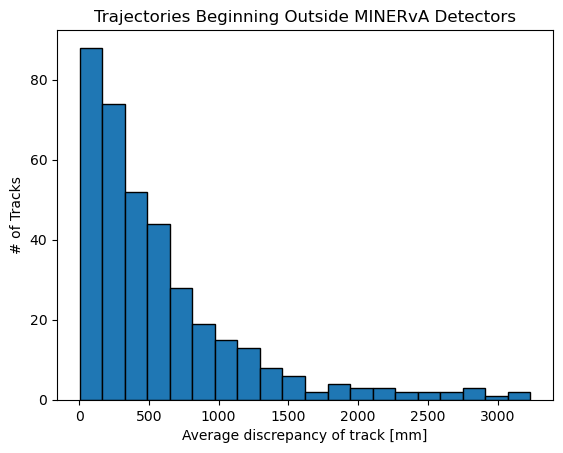

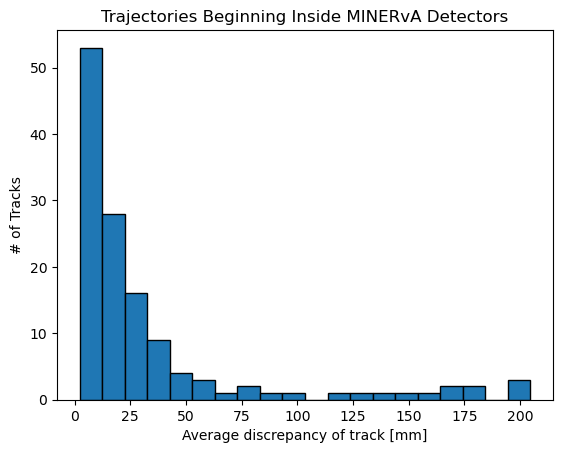

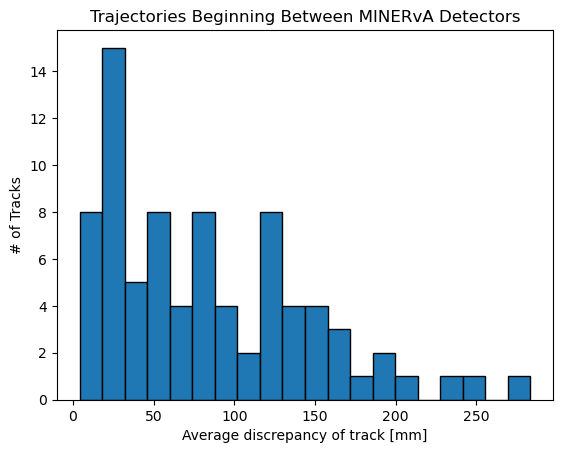

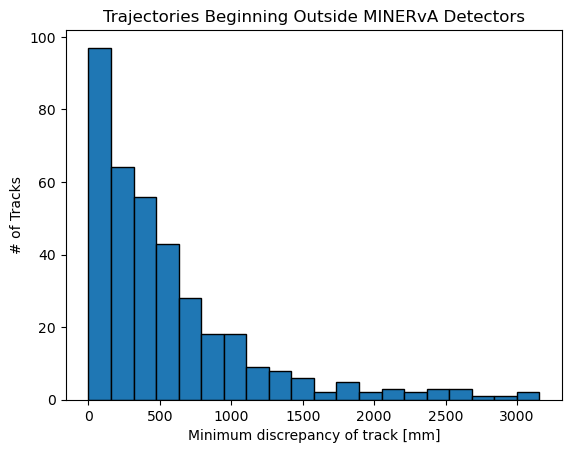

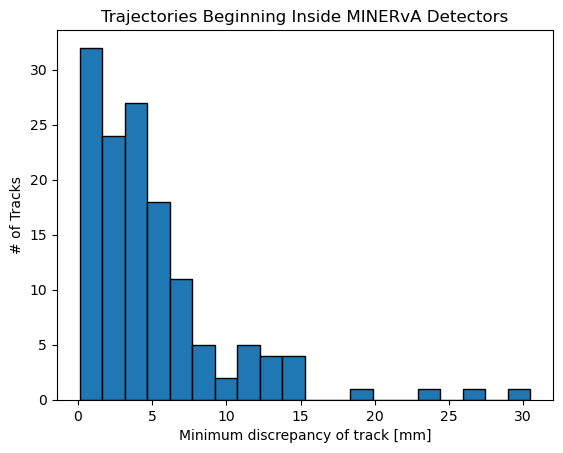

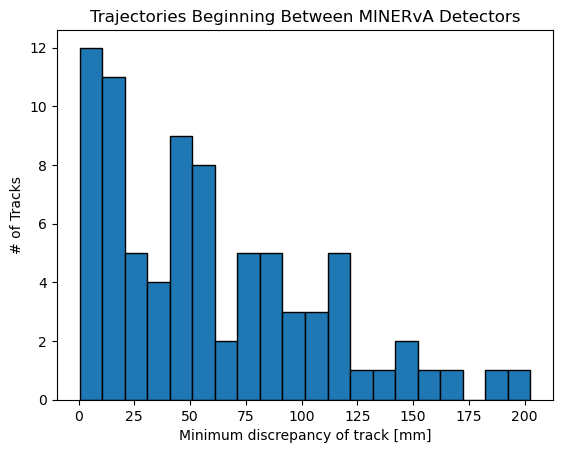

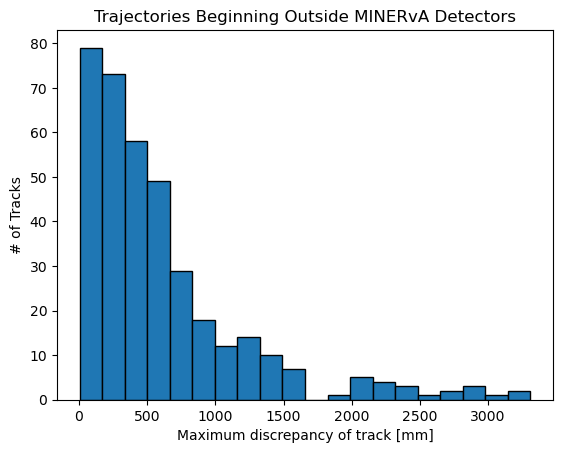

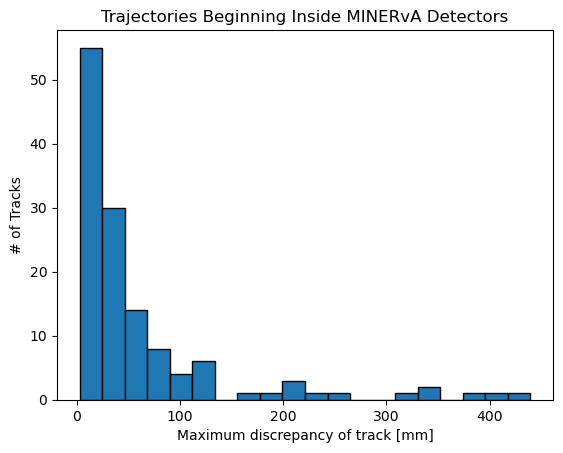

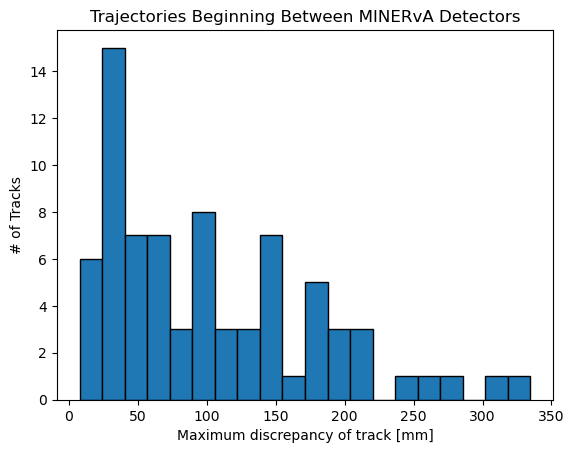

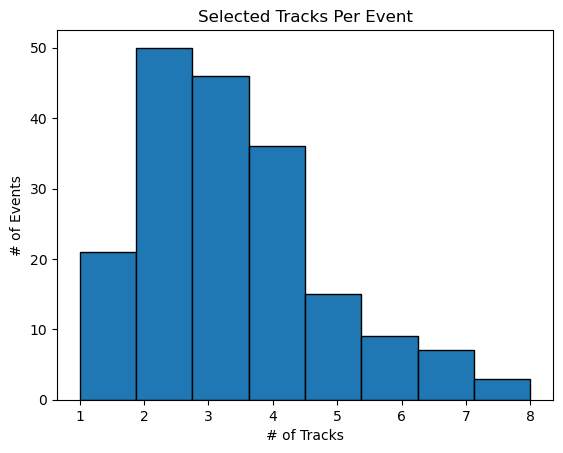

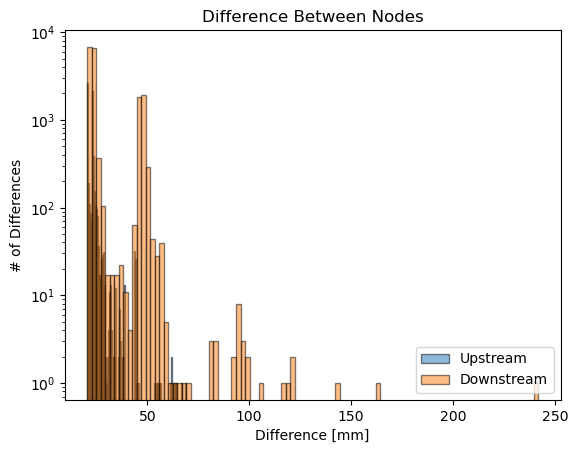

In [204]:
particles = ['Electrons/Positrons', 'Muons', 'Antimuons', 'Pions', 'Protons', 'Others']
plt.figure(figsize=(10, 6))
plt.bar(particles, particle_count_final, color=['blue', 'orange', 'black', 'green', 'red', 'purple'])
plt.title('Particle Counts')
plt.xlabel('Particle Type')
plt.ylabel('Count')
plt.show()
    
#print("Particle Track location count: ", particle_places_final, " ", sum(particle_places_final))
#print("Index list for nodes: ", index_track_final)
#print("inCheck_final: ", inCheck_final)
#print("Number of tracks: ", idx_count_final)
#print("inCheck_by_track: ", inCheck_by_track_final)
#print(len(inCheck_by_track_final))

average_distance_in=in_distance_sum/inCount
average_distance_out=out_distance_sum/outCount
average_distance_between=between_distance_sum/betweenCount
#print("Average Discrepancy between true and simulated tracks for particles in the detector: ", average_distance_in)
#print("Average Discrepancy between true and simulated tracks for particles out of the detector: ", average_distance_out)
#print("Average Discrepancy between true and simulated tracks for particles between the detectors: ", average_distance_between)

#out, in, between. 0,1,2

#average distance of each track separated by initial position
for i in range(idx_count_final):
    if (inCheck_by_track_final[i]==0):
        avg_dist_out.append((sum(dist_by_track_final[i]))/len(dist_by_track_final[i]))
        min_dist_out.append(min_dist_final[i])
        #for j in range(len(max_dist_out)):
            #if (max_dist_out[j]==max_dist_final[i]):
                #print("Duplicate value indexs: ", i, " ", j, " ", max_dist_final[i], " ", max_dist_out[j])
        max_dist_out.append(max_dist_final[i])

    elif (inCheck_by_track_final[i]==1):
        avg_dist_in.append((sum(dist_by_track_final[i]))/len(dist_by_track_final[i]))
        min_dist_in.append(min_dist_final[i])
        max_dist_in.append(max_dist_final[i])
    elif (inCheck_by_track_final[i]==2):
        avg_dist_btwn.append((sum(dist_by_track_final[i]))/len(dist_by_track_final[i]))
        min_dist_btwn.append(min_dist_final[i])
        max_dist_btwn.append(max_dist_final[i])

#print("Number of entries in average distance between events: ", len(avg_dist_btwn))

threshold_out=3500
threshold_in=250
threshold_btwn=300

min_threshold_out=3500
min_threshold_in=35
min_threshold_btwn=250

max_threshold_out=3500
max_threshold_in=460
max_threshold_btwn=400

min_dist_out=np.array(min_dist_out)
min_dist_in=np.array(min_dist_in)
min_dist_btwn=np.array(min_dist_btwn)

max_dist_out=np.array(max_dist_out)
max_dist_in=np.array(max_dist_in)
max_dist_btwn=np.array(max_dist_btwn)

# Filter the data to get values above the thresholds (cut off values)
cutoff_min_dist_out = min_dist_out[min_dist_out > min_threshold_out]
cutoff_min_dist_in = min_dist_in[min_dist_in > min_threshold_in]
cutoff_min_dist_btwn = min_dist_btwn[min_dist_btwn > min_threshold_btwn]

cutoff_max_dist_out = max_dist_out[max_dist_out > max_threshold_out]
cutoff_max_dist_in = max_dist_in[max_dist_in > max_threshold_in]
cutoff_max_dist_btwn = max_dist_btwn[max_dist_btwn > max_threshold_btwn]

filtered_avg_dist_out=np.array(avg_dist_out)
filtered_avg_dist_in=np.array(avg_dist_in)
filtered_avg_dist_btwn=np.array(avg_dist_btwn)

# Filter the data to get values above the thresholds (cut off values)
cutoff_avg_dist_out = filtered_avg_dist_out[filtered_avg_dist_out > threshold_out]
cutoff_avg_dist_in = filtered_avg_dist_in[filtered_avg_dist_in > threshold_in]
cutoff_avg_dist_btwn = filtered_avg_dist_btwn[filtered_avg_dist_btwn > threshold_btwn]

# Print the cut off values
print("Values cut off (out, avg):", cutoff_avg_dist_out)
print("Values cut off (in, avg):", cutoff_avg_dist_in)
print("Values cut off (btwn, avg):", cutoff_avg_dist_btwn)

# Print the cut off values
print("Values cut off (out, min):", cutoff_min_dist_out)
print("Values cut off (in, min):", cutoff_min_dist_in)
print("Values cut off (btwn, min):", cutoff_min_dist_btwn)

# Print the cut off values
print("Values cut off (out, max):", cutoff_max_dist_out)
print("Values cut off (in, max):", cutoff_max_dist_in)
print("Values cut off (btwn, max):", cutoff_max_dist_btwn)

print("\n\n\n\n\n")

filtered_avg_dist_out=filtered_avg_dist_out[filtered_avg_dist_out <= threshold_out]
filtered_avg_dist_in=filtered_avg_dist_in[filtered_avg_dist_in <= threshold_in]
filtered_avg_dist_btwn=filtered_avg_dist_btwn[filtered_avg_dist_btwn <= threshold_btwn]

min_dist_out=min_dist_out[min_dist_out <= min_threshold_out]
min_dist_in=min_dist_in[min_dist_in <= min_threshold_in]
min_dist_btwn=min_dist_btwn[min_dist_btwn <= min_threshold_btwn]

max_dist_out=max_dist_out[max_dist_out <= max_threshold_out]
max_dist_in=max_dist_in[max_dist_in <= max_threshold_in]
max_dist_btwn=max_dist_btwn[max_dist_btwn <= max_threshold_btwn]

plt.hist(filtered_avg_dist_out, bins=20, edgecolor='black')
plt.title('Trajectories Beginning Outside MINERvA Detectors')
plt.xlabel('Average discrepancy of track [mm]')
plt.ylabel('# of Tracks')
plt.show()

plt.hist(filtered_avg_dist_in, bins=20, edgecolor='black')
plt.title('Trajectories Beginning Inside MINERvA Detectors')
plt.xlabel('Average discrepancy of track [mm]')
plt.ylabel('# of Tracks')
plt.show()

plt.hist(filtered_avg_dist_btwn, bins=20, edgecolor='black')
plt.title('Trajectories Beginning Between MINERvA Detectors')
plt.xlabel('Average discrepancy of track [mm]')
plt.ylabel('# of Tracks')
plt.show()

plt.hist(min_dist_out, bins=20, edgecolor='black')
plt.title('Trajectories Beginning Outside MINERvA Detectors')
plt.xlabel('Minimum discrepancy of track [mm]')
plt.ylabel('# of Tracks')
plt.show()

plt.hist(min_dist_in, bins=20, edgecolor='black')
plt.title('Trajectories Beginning Inside MINERvA Detectors')
plt.xlabel('Minimum discrepancy of track [mm]')
plt.ylabel('# of Tracks')
plt.show()

plt.hist(min_dist_btwn, bins=20, edgecolor='black')
plt.title('Trajectories Beginning Between MINERvA Detectors')
plt.xlabel('Minimum discrepancy of track [mm]')
plt.ylabel('# of Tracks')
plt.show()

plt.hist(max_dist_out, bins=20, edgecolor='black')
plt.title('Trajectories Beginning Outside MINERvA Detectors')
plt.xlabel('Maximum discrepancy of track [mm]')
plt.ylabel('# of Tracks')
plt.show()

plt.hist(max_dist_in, bins=20, edgecolor='black')
plt.title('Trajectories Beginning Inside MINERvA Detectors')
plt.xlabel('Maximum discrepancy of track [mm]')
plt.ylabel('# of Tracks')
plt.show()

plt.hist(max_dist_btwn, bins=20, edgecolor='black')
plt.title('Trajectories Beginning Between MINERvA Detectors')
plt.xlabel('Maximum discrepancy of track [mm]')
plt.ylabel('# of Tracks')
plt.show()

traj_count=np.array(traj_count)
traj_count = traj_count[traj_count > 0]

plt.hist(traj_count, bins=8, edgecolor='black')
plt.title('Selected Tracks Per Event')
plt.xlabel('# of Tracks')
plt.ylabel('# of Events')
plt.show()

#print("node us: ", node_dif_us_final)
#print()
#print("node ds: ", node_dif_ds_final)

plt.hist(node_dif_us_final, alpha=0.5, bins=100, edgecolor='black')
plt.hist(node_dif_ds_final, alpha=0.5, bins=100, edgecolor='black')
plt.yscale('log')
plt.title('Difference Between Nodes')
plt.xlabel('Difference [mm]')
plt.ylabel('# of Differences')
plt.legend(["Upstream", "Downstream"], loc="lower right")
plt.show()


In [ ]:
get_truth_2x2(NdFlow,i)

In [ ]:
entry=101
hit_start_index = NdFlow.event_hit_indices.fields("start")[entry]
hit_stop_index = NdFlow.event_hit_indices.fields("stop")[entry]
backtracked_hits = NdFlow.backtracked_hits[hit_start_index:hit_stop_index]
print(len(backtracked_hits))
seg_ids = np.concatenate([bhit.fields('segment_id')[bhit.fields('fraction')!=0.] for bhit in backtracked_hits])
print(seg_ids)

## Other test code

In [ ]:
v_dist = [] 
names_bad = [] 
events_bad = [] 
idx_bad = [] 
slice_bad = [] 
good_crossing = []
z_down = []
z_up = []
tot  = 0
file_list = ["MiniRun5_1E19_RHC.minerva.0000087.dst.root"] #,
             #"MiniRun5_1E19_RHC.minerva.0000845.dst.root"]
#Loop over a set of files to compute the true and reco start and end differences for the tracks
#for filename in os.listdir("/home/nroy/DUNE/MegaRun5/new_dsts/"):
for filename in file_list:
    file = filename
    Mx2Hits = Mx2Data(file)

    for entry in range(len(Mx2Hits.clus_id_time_slice)):
        for idx in Mx2Hits.trk_index[entry]:

            #Placeholder for the hit true positions and the track node position
            hit_y = []
            hit_x = []
            x = []
            y = []
    
            nodes = Mx2Hits.trk_nodes[entry][idx]
            if (abs(Mx2Hits.trk_node_Z[entry][idx][0] - Mx2Hits.trk_node_Z[entry][idx][nodes-1])) <3000:
                continue   


            # first and last track nodes
            
            cl_i = Mx2Hits.trk_node_cluster_idx[entry][idx][0]
            cl_if = Mx2Hits.trk_node_cluster_idx[entry][idx][nodes -1]
    

            #list of hits that contributes to the fist node
    
            hit_list = Mx2Hits.clus_id_hits_idx[entry][cl_i]
            hit_list = hit_list[hit_list>=0]
            nhits = Mx2Hits.mc_id_nmchit[entry][hit_list]
            nhits = np.where(nhits>2,2,nhits)
            
            hy_hits = np.concatenate([Mx2Hits.mc_id_mchit_y[entry][hit_list][i][:nhits[i]] for i in range(len(nhits))])
            hx_hits = np.concatenate([Mx2Hits.mc_id_mchit_x[entry][hit_list][i][:nhits[i]] for i in range(len(nhits))])
            hde_hits = np.concatenate([Mx2Hits.mc_id_mchit_dE[entry][hit_list][i][:nhits[i]] for i in range(len(nhits))])


            #Track node start position
            x.append(Mx2Hits.trk_node_X[entry][idx][0])
            y.append(Mx2Hits.trk_node_Y[entry][idx][0])

            #True weighted position of first track node
            hit_y.append(((hy_hits  * hde_hits) / hde_hits.sum()).sum())
            hit_x.append(((hx_hits  * hde_hits) / hde_hits.sum()).sum())
    
            hit_list = Mx2Hits.clus_id_hits_idx[entry][cl_if]
            hit_list = hit_list[hit_list>=0]
            nhits = Mx2Hits.mc_id_nmchit[entry][hit_list]
            nhits = np.where(nhits>2,2,nhits)
            
            hy_hits = np.concatenate([Mx2Hits.mc_id_mchit_y[entry][hit_list][i][:nhits[i]] for i in range(len(nhits))])
            hx_hits = np.concatenate([Mx2Hits.mc_id_mchit_x[entry][hit_list][i][:nhits[i]] for i in range(len(nhits))])
            hde_hits = np.concatenate([Mx2Hits.mc_id_mchit_dE[entry][hit_list][i][:nhits[i]] for i in range(len(nhits))])

            #Track node end position
            x.append(Mx2Hits.trk_node_X[entry][idx][nodes-1])
            y.append(Mx2Hits.trk_node_Y[entry][idx][nodes-1])


            #True weighted position of end track node
            hit_y.append(((hy_hits  * hde_hits) / hde_hits.sum()).sum())
            hit_x.append(((hx_hits  * hde_hits) / hde_hits.sum()).sum())
    
            hit_x = np.array(hit_x)
            hit_y = np.array(hit_y)
            
            dx = np.abs(hit_x - x) 
            dy = np.abs(hit_y -y)
            dist = np.sqrt((hit_x -x)*(hit_x -x) + (hit_y -y)*(hit_y -y))
            dist = np.max(dist)
            tot+=1
            # if dist<300:
            #     continue

            z = Mx2Hits.trk_node_Z[entry][idx][:nodes]
            good_crossing.append(((z<7000).sum()>2) & ((z>7000).sum()>2))
            z_up.append((z<7000).sum())
            z_down.append((z>7000).sum())
            
                
            v_dist.append(dist)
            names_bad.append(file)
            events_bad.append(entry)
            idx_bad.append(idx)
            slice_bad.append(Mx2Hits.trk_time_slice[entry][idx])
            
                    
v_dist = np.array(v_dist)
names_bad = np.array(names_bad)
events_bad = np.array(events_bad)
idx_bad = np.array(idx_bad)
slice_bad = np.array(slice_bad)
good_crossing = np.array(good_crossing)

z_up = np.array(z_up)
z_down = np.array(z_down)

In [ ]:
 def GetEventIDFromSegments(self, backtracked_hits, segments):
   
        try:
            seg_ids = np.concatenate([bhit.fields('segment_id')[bhit.fields('fraction')!=0.] for bhit in backtracked_hits])
            print(seg_ids)
            return np.unique(segments[seg_ids]['event_id'])

        except ValueError:
            valid_frac_counts = [(bhit.fields('fraction')!=0.).sum() for bhit in backtracked_hits]
            if sum(valid_frac_counts) > 0:
                # case the original error was not due to empty association, re-raise
                raise
            print(f'[SuperaDriver] UNEXPECTED: found no hit with any association to the truth hit')
            return np.array([])

segment_id = NdFlow.segments.fields("segment_id")[entry]
hit_start_index = NdFlow.event_hit_indices.fields("start")[entry]
hit_stop_index = NdFlow.event_hit_indices.fields("stop")[entry]
backtracked_hits = NdFlow.backtracked_hits[hit_start_index:hit_stop_index]

st_event_id = self.GetEventIDFromSegments(backtracked_hits,self._segments)

if len(st_event_id) < 1:
    return result

assert len(st_event_id)==1, f'Found >1 unique "event_id" from backtracked segments ({st_event_id})'

st_event_id = st_event_id[0]

result.segments = self._segments[self._segments['event_id']==st_event_id]
result.trajectories = self._trajectories[self._trajectories['event_id']==st_event_id]

In [205]:
import random
import torch
import numpy as np

from mlreco.models.layers.common.dbscan import DBSCANFragmenter
from mlreco.models.layers.common.momentum import DeepVertexNet, EvidentialMomentumNet, MomentumNet, VertexNet
from mlreco.models.experimental.transformers.transformer import TransformerEncoderLayer
from mlreco.models.layers.gnn import gnn_model_construct, node_encoder_construct, edge_encoder_construct, node_loss_construct, edge_loss_construct

from mlreco.utils.globals import *
from mlreco.utils.gnn.data import merge_batch, split_clusts, split_edge_index
from mlreco.utils.gnn.cluster import form_clusters, get_cluster_batch, get_cluster_label, get_cluster_primary_label, get_cluster_points_label, get_cluster_directions, get_cluster_dedxs
from mlreco.utils.gnn.network import complete_graph, delaunay_graph, mst_graph, bipartite_graph, inter_cluster_distance, knn_graph, restrict_graph

class GNN(torch.nn.Module):
    """
    Driver class for cluster node+edge prediction, assumed to be a GNN model.

    This class mostly acts as a wrapper that will hand the graph data to another model.
    If DBSCAN is used, use the semantic label tensor as an input.

    Typical configuration can look like this:

    .. code-block:: yaml

        model:
          name: grappa
          modules:
            grappa:
              your config goes here

    Configuration
    -------------
    base: dict
        Configuration of base Grappa :

        .. code-block:: yaml

          base:
            source_col      : <column in the input data that specifies the source node ids of each voxel (default 5)>
            target_col      : <column in the input data that specifies the target instance ids of each voxel (default 6)>
            node_type       : <semantic class to aggregate (all classes if -1, default -1)>
            node_min_size   : <minimum number of voxels inside a cluster to be included in the aggregation (default -1, i.e. no threshold)>
            add_points      : <add label point(s) to the node features: False (none) or True (both) (default False)>
            add_local_dirs  : <add reconstructed local direction(s) to the node features: False (none), True (both) or 'start' (default False)>
            dir_max_dist    : <maximium distance between start point and cluster voxels to be used to estimate direction: support value or 'optimize' (default 5 voxels)>
            add_local_dedxs : <add reconstructed local dedx(s) to the node features: False (none), True (both) or 'start' (default False)>
            dedx_max_dist   : <maximium distance between start point and cluster voxels to be used to estimate dedx (default 5 voxels)>
            network         : <type of network: 'complete', 'delaunay', 'mst', 'knn' or 'bipartite' (default 'complete')>
            edge_max_dist   : <maximal edge Euclidean length (default -1)>
            edge_dist_method: <edge length evaluation method: 'centroid' or 'voxel' (default 'voxel')>
            merge_batch     : <flag for whether to merge batches (default False)>
            merge_batch_mode: <mode of batch merging, 'const' or 'fluc'; 'const' use a fixed size of batch for merging, 'fluc' takes the input size a mean and sample based on it (default 'const')>
            merge_batch_size: <size of batch merging (default 2)>
            shuffle_clusters: <randomize cluster order (default False)>

    dbscan: dict

        dictionary of dbscan parameters

    node_encoder: dict

        .. code-block:: yaml

          node_encoder:
            name: <name of the node encoder>
            <dictionary of arguments to pass to the encoder>
            model_path      : <path to the encoder weights>

    edge_encoder: dict

        .. code-block:: yaml

          edge_encoder:
            name: <name of the edge encoder>
            <dictionary of arguments to pass to the encoder>
            model_path      : <path to the encoder weights>
    
    gnn_model: dict
        .. code-block:: yaml

          gnn_model:
            name: <name of the node model>
            <dictionary of arguments to pass to the model>
            model_path      : <path to the model weights>
    
    kinematics_mlp: bool, default False
        Whether to enable MLP-like layers after the GNN to predict
        momentum, particle type, etc.
    kinematics_type: bool
        Whether to add PID MLP to each node.
    kinematics_momentum: bool
        Whether to add momentum MLP to each node.
    type_net: dict
        Configuration for the PID MLP (if enabled).
        Can partial load weights here too.
    momentum_net: dict
        Configuration for the Momentum MLP (if enabled).
        Can partial load weights here too.
    vertex_mlp: bool, default False
        Whether to add vertex prediction MLP to each node.
        Includes primary particle + vertex coordinates predictions.
    vertex_net: dict
        Configuration for the Vertex MLP (if enabled).
        Can partial load weights here too.
    
    Outputs
    -------
    node_features:
    edge_features:
    clusts:
    edge_index:
    node_pred:
    edge_pred:
    node_pred_p:
    node_pred_type:
    node_pred_vtx:

    See Also
    --------
    GNNLoss
    """

    MODULES = [('grappa', ['base', 'dbscan', 'node_encoder', 'edge_encoder', 'gnn_model']), 'grappa_loss']

    RETURNS = {
        'batch_ids': ['tensor'],
        'clusts' : ['index_list', ['input_data', 'batch_ids'], True],
        'node_features': ['tensor', 'batch_ids', True],
        'node_pred': ['tensor', 'batch_ids', True],
        'node_pred_type': ['tensor', 'batch_ids', True],
        'node_pred_vtx': ['tensor', 'batch_ids', True],
        'node_pred_p': ['tensor', 'batch_ids', True],
        'start_points': ['tensor', 'batch_ids', False, True],
        'end_points': ['tensor', 'batch_ids', False, True],
        'group_pred': ['index_tensor', 'batch_ids', True],
        'edge_features': ['edge_tensor', ['edge_index', 'batch_ids'], True],
        'edge_index': ['edge_tensor', ['edge_index', 'batch_ids'], True],
        'edge_pred': ['edge_tensor', ['edge_index', 'batch_ids'], True]
    }

    def __init__(self, cfg, name='grappa', batch_col=0, coords_col=(1, 4)):
        super(GNN, self).__init__()

        # Get the chain input parameters
        base_config = cfg[name].get('base', {})
        self.name = name
        self.batch_index = batch_col
        self.coords_index = coords_col

        # Choose what type of node to use
        self.source_col       = base_config.get('source_col', 5)
        self.target_col       = base_config.get('target_col', 6)
        self.node_type        = base_config.get('node_type', -1)
        self.node_min_size    = base_config.get('node_min_size', -1)
        self.add_points       = base_config.get('add_points', False)
        self.add_local_dirs   = base_config.get('add_local_dirs', False)
        self.dir_max_dist     = base_config.get('dir_max_dist', 5)
        self.opt_dir_max_dist = self.dir_max_dist == 'optimize'
        self.add_local_dedxs  = base_config.get('add_local_dedxs', False)
        self.dedx_max_dist    = base_config.get('dedx_max_dist', 5)
        self.break_clusters   = base_config.get('break_clusters', False)
        self.shuffle_clusters = base_config.get('shuffle_clusters', False)

        # *Deprecated* but kept for backward compatibility:
        if 'add_start_point'    in base_config: self.add_points = base_config['add_start_point']
        if 'add_start_dir'      in base_config: self.add_local_dirs = 'start' if base_config['add_start_dir'] else False
        if 'add_start_dedx'     in base_config: self.add_local_dedxs = 'start' if base_config['add_start_dedx'] else False
        if 'start_dir_max_dist' in base_config: self.dir_max_dist = self.dedx_max_dist = base_config['start_dir_max_dist']
        if 'start_dir_opt'      in base_config: self.opt_dir_max_dist = base_config['start_dir_opt']

        # Interpret node type as list of classes to cluster, -1 means all classes
        if isinstance(self.node_type, int): self.node_type = [self.node_type]

        # Choose what type of network to use
        self.network = base_config.get('network', 'complete')
        self.edge_max_dist = base_config.get('edge_max_dist', -1)
        self.edge_dist_metric = base_config.get('edge_dist_metric', 'voxel')
        self.edge_dist_algorithm = base_config.get('edge_dist_algorithm', 'brute')
        self.edge_knn_k = base_config.get('edge_knn_k', 5)
        self.edge_max_count = base_config.get('edge_max_count', 2e6)

        # Turn the edge_max_dist value into a matrix
        if not isinstance(self.edge_max_dist, list): self.edge_max_dist = [self.edge_max_dist]
        mat_size = int((np.sqrt(8*len(self.edge_max_dist)+1)-1)/2)
        max_dist_mat = np.zeros((mat_size, mat_size), dtype=float)
        max_dist_mat[np.triu_indices(mat_size)] = self.edge_max_dist
        max_dist_mat += max_dist_mat.T - np.diag(np.diag(max_dist_mat))
        self.edge_max_dist = max_dist_mat

        # If requested, merge images together within the batch
        self.merge_batch = base_config.get('merge_batch', False)
        self.merge_batch_mode = base_config.get('merge_batch_mode', 'const')
        self.merge_batch_size = base_config.get('merge_batch_size', 2)
        if self.merge_batch_mode not in ['const', 'fluc']:
            raise ValueError('Batch merging mode not supported, must be one of const or fluc')
        self.merge_batch_fluc = self.merge_batch_mode == 'fluc'

        # If requested, use DBSCAN to form clusters from semantics
        if 'dbscan' in cfg[name]:
            cfg[name]['dbscan']['cluster_classes'] = self.node_type if self.node_type[0] > -1 else [0,1,2,3]
            cfg[name]['dbscan']['min_size']        = self.node_min_size
            self.dbscan = DBSCANFragmenter(cfg[name], name='dbscan',
                                            batch_col=self.batch_index,
                                            coords_col=self.coords_index)
    
        # If requested, initialize two MLPs for kinematics predictions
        self.kinematics_mlp = base_config.get('kinematics_mlp', False)
        self.kinematics_type = base_config.get('kinematics_type', False)
        self.kinematics_momentum = base_config.get('kinematics_momentum', False)
        if self.kinematics_mlp:
            node_output_feats = cfg[name]['gnn_model'].get('node_output_feats', 64)
            self.kinematics_type = base_config.get('kinematics_type', False)
            self.kinematics_momentum = base_config.get('kinematics_momentum', False)
            if self.kinematics_type:
                type_config = cfg[name].get('type_net', {})
                type_net_mode = type_config.get('mode', 'standard')
                type_net_num_classes = type_config.get('num_classes', 5)
                if type_net_mode == 'linear':
                    self.type_net = torch.nn.Linear(node_output_feats, type_net_num_classes)
                elif type_net_mode == 'standard':
                    self.type_net = MomentumNet(node_output_feats,
                                                num_output=type_net_num_classes,
                                                num_hidden=type_config.get('num_hidden', 128),
                                                positive_outputs=type_config.get('positive_outputs', False))
                elif type_net_mode == 'edl':
                    self.type_net = MomentumNet(node_output_feats,
                                                num_output=type_net_num_classes,
                                                num_hidden=type_config.get('num_hidden', 128),
                                                positive_outputs=type_config.get('positive_outputs', True))
                else:
                    raise ValueError('Unrecognized Particle ID Type Net Mode: ', type_net_mode)
            if self.kinematics_momentum:
                momentum_config = cfg[name].get('momentum_net', {})
                softplus_and_shift = momentum_config.get('eps', 0.0)
                logspace = momentum_config.get('logspace', False)
                if momentum_config.get('mode', 'standard') == 'edl':
                    self.momentum_net = EvidentialMomentumNet(node_output_feats,
                                                              num_output=4,
                                                              num_hidden=momentum_config.get('num_hidden', 128),
                                                              eps=softplus_and_shift,
                                                              logspace=logspace)
                else:
                    self.momentum_net = MomentumNet(node_output_feats,
                                                    num_output=1,
                                                    num_hidden=momentum_config.get('num_hidden', 128))
    
        self.vertex_mlp = base_config.get('vertex_mlp', False)
        if self.vertex_mlp:
            node_feats = cfg[name]['gnn_model'].get('node_feats')
            node_output_feats = cfg[name]['gnn_model'].get('node_output_feats')
            vertex_config = cfg[name].get('vertex_net', {'name': 'momentum_net'})
            self.pred_vtx_positions = vertex_config.get('pred_vtx_positions', True)
            self.use_vtx_input_features = vertex_config.get('use_vtx_input_features', False)
            self.add_vtx_input_features = vertex_config.get('add_vtx_input_features', False)
            num_input  = node_output_feats + node_feats * self.add_vtx_input_features 
            num_output = 2 + 3 * self.pred_vtx_positions
            vertex_net_name = vertex_config.get('name', 'momentum_net')
            if vertex_net_name == 'linear':
                self.vertex_net = torch.nn.Linear(num_input, num_output)
            elif vertex_net_name == 'momentum_net':
                self.vertex_net = VertexNet(num_input, num_output,
                                            num_hidden=vertex_config.get('num_hidden', 64),
                                            positive_outputs=vertex_config.get('positive_outputs',False))
            elif vertex_net_name == 'attention_net':
                self.vertex_net = TransformerEncoderLayer(num_input, num_output, **vertex_config)
            elif vertex_net_name == 'deep_vertex_net':
                self.vertex_net = DeepVertexNet(num_input, num_output,
                                                num_hidden=vertex_config.get('num_hidden', 64),
                                                num_layers=vertex_config.get('num_layers', 5),
                                                positive_outputs=vertex_config.get('positive_outputs',False))
            else:
                raise ValueError('Vertex MLP {} not recognized!'.format(vertex_config['name']))

        # Initialize encoders
        self.node_encoder = node_encoder_construct(cfg[name])
        self.edge_encoder = edge_encoder_construct(cfg[name])

        # Construct the GNN
        self.gnn_model = gnn_model_construct(cfg[name])

    def forward(self, data, clusts=None, groups=None, points=None, extra_feats=None, batch_size=None):
        """
        Prepares particle clusters and feed them to the GNN model.

        Args:
            array:
                data[0] ([torch.tensor]): (N,5-10) [x, y, z, batch_id(, value), part_id(, group_id, int_id, nu_id, sem_type)]
                                       or (N,5) [x, y, z, batch_id, sem_type] (with DBSCAN)
                data[1] ([torch.tensor]): (N,8) [first_x, first_y, first_z, batch_id, last_x, last_y, last_z, first_step_t] (optional)
            clusts: [(N_0), (N_1), ..., (N_C)] Cluster ids (optional)
            groups: (C) vectors of groups IDs (one per cluster) to enforce connections only within each group
            points: (N,3/6) tensor of start (and end) points of clusters
            extra_feats: (N,F) tensor of features to add to the encoded features
        Returns:
            dict:
                'node_pred' (torch.tensor): (N,2) Two-channel node predictions (split batch-wise)
                'edge_pred' (torch.tensor): (E,2) Two-channel edge predictions (split batch-wise)
                'clusts' ([np.ndarray])   : [(N_0), (N_1), ..., (N_C)] Cluster ids (split batch-wise)
                'edge_index' (np.ndarray) : (E,2) Incidence matrix (split batch-wise)
        """
        cluster_data = data[0]
        if len(data) > 1: particles = data[1]
        result = {}

        # Form list of list of voxel indices, one list per cluster in the requested class
        if clusts is None:
            if hasattr(self, 'dbscan'):
                clusts = self.dbscan(cluster_data, points=particles if len(data) > 1 else None)
            else:
                clusts = form_clusters(cluster_data.detach().cpu().numpy(),
                                       self.node_min_size,
                                       self.source_col,
                                       cluster_classes=self.node_type)
                if self.break_clusters:
                    from sklearn.cluster import DBSCAN
                    dbscan = DBSCAN(eps=1.1, min_samples=1, metric='chebyshev')
                    broken_clusts = []
                    for c in clusts:
                        labels = dbscan.fit(cluster_data[c, self.coords_index[0]:self.coords_index[1]].detach().cpu().numpy()).labels_
                        for l in np.unique(labels):
                            broken_clusts.append(c[labels==l])
                    clusts = broken_clusts

        # If requested, shuffle the order in which the clusters are listed (used for debugging)
        if self.shuffle_clusters:
            random.shuffle(clusts)

        # If requested, merge images together within the batch
        if self.merge_batch:
            cluster_data, particles, batch_list = merge_batch(cluster_data, particles, self.merge_batch_size, self.merge_batch_fluc)
            batch_counts = np.unique(batch_list, return_counts=True)[1]
            result['batch_counts'] = [batch_counts]

        # If an event is missing from the input data - e.g., deghosting
        # erased everything (extreme case but possible if very few voxels)
        # then we might be miscounting batches. Ensure that batches is the
        # same length as batch_size if specified.
        batches, bcounts = np.unique(cluster_data[:,self.batch_index].detach().cpu().numpy(), return_counts=True)
        if batch_size is not None:
            new_bcounts = np.zeros(batch_size, dtype=np.int64)
            new_bcounts[batches.astype(np.int64)] = bcounts
            bcounts = new_bcounts
            batches = np.arange(batch_size)

        # Update result with a list of clusters for each batch id
        if not len(clusts):
            return {**result,
                    'clusts':    [[np.array([]) for _ in batches]],
                    'batch_ids': [np.array([])]}

        batch_ids = get_cluster_batch(cluster_data, clusts)
        clusts_split, cbids = split_clusts(clusts, batch_ids, batches, bcounts)
        result['clusts'] = [clusts_split]
        result['batch_ids'] = [batch_ids]
        if self.edge_max_count > -1:
            _, cnts = np.unique(batch_ids, return_counts=True)
            if np.sum([c*(c-1) for c in cnts]) > 2*self.edge_max_count:
                print('The complete graph is too large, must skip batch') # TODO: use logging
                return result

        # If necessary, compute the cluster distance matrix
        dist_mat, closest_index = None, None
        if np.any(self.edge_max_dist > -1) or self.network == 'mst' or self.network == 'knn':
            dist_mat, closest_index = inter_cluster_distance(cluster_data[:,self.coords_index[0]:self.coords_index[1]].float(), clusts, batch_ids, self.edge_dist_metric, self.edge_dist_algorithm, return_index=True)

        # Form the requested network
        if len(clusts) == 1:
            edge_index = np.empty((2,0), dtype=np.int64)
        elif self.network == 'complete':
            edge_index = complete_graph(batch_ids)
        elif self.network == 'delaunay':
            import numba as nb
            edge_index = delaunay_graph(cluster_data.cpu().numpy(), nb.typed.List(clusts), batch_ids, self.batch_index, self.coords_index)
        elif self.network == 'mst':
            edge_index = mst_graph(batch_ids, dist_mat)
        elif self.network == 'knn':
            edge_index = knn_graph(batch_ids, self.edge_knn_k, dist_mat)
        elif self.network == 'bipartite':
            clust_ids = get_cluster_label(cluster_data, clusts, self.source_col)
            group_ids = get_cluster_label(cluster_data, clusts, self.target_col)
            edge_index = bipartite_graph(batch_ids, clust_ids==group_ids, dist_mat)
        else:
            raise ValueError('Network type not recognized: '+self.network)

        # If groups is sepecified, only keep edges that belong to the same group (cluster graph)
        if groups is not None:
            mask = groups[edge_index[0]] == groups[edge_index[1]]
            edge_index = edge_index[:,mask]

        # Restrict the input graph based on edge distance, if requested
        if np.any(self.edge_max_dist > -1):
            if self.edge_max_dist.shape[0] == 1:
                edge_index = restrict_graph(edge_index, dist_mat, self.edge_max_dist)
            else:
                # Here get_cluster_primary_label is used to ensure that Michel/Delta showers are given the appropriate semantic label
                if self.source_col == 5: classes = extra_feats[:,-1].cpu().numpy().astype(int) if extra_feats is not None else get_cluster_label(cluster_data, clusts, -1).astype(int)
                if self.source_col == 6: classes = extra_feats[:,-1].cpu().numpy().astype(int) if extra_feats is not None else get_cluster_primary_label(cluster_data, clusts, -1).astype(int)
                edge_index = restrict_graph(edge_index, dist_mat, self.edge_max_dist, classes)

            # Get index of closest pair of voxels for each pair of clusters
            closest_index = closest_index[edge_index[0], edge_index[1]]

        # Update result with a list of edges for each batch id
        edge_index_split, ebids = split_edge_index(edge_index, batch_ids, batches)
        result['edge_index'] = [edge_index_split]
        if edge_index.shape[1] > self.edge_max_count:
            return result

        # Obtain node and edge features
        x = self.node_encoder(cluster_data, clusts)
        e = self.edge_encoder(cluster_data, clusts, edge_index, closest_index=closest_index)

        # If extra features are provided separately, add them
        if extra_feats is not None:
            x = torch.cat([x, extra_feats.float()], dim=1)

        # Add end points and/or local directions to node features, if requested
        if self.add_points or points is not None:
            if points is None:
                points = get_cluster_points_label(cluster_data, particles, clusts)
            x = torch.cat([x, points.float()], dim=1)
            result['start_points'] = [np.hstack([batch_ids[:,None], points[:,:3].detach().cpu().numpy()])]
            result['end_points'] = [np.hstack([batch_ids[:,None], points[:,3:].detach().cpu().numpy()])]
            if self.add_local_dirs:
                dirs_start = get_cluster_directions(cluster_data[:, self.coords_index[0]:self.coords_index[1]], points[:,:3], clusts, self.dir_max_dist, self.opt_dir_max_dist)
                if self.add_local_dirs != 'start':
                    dirs_end = get_cluster_directions(cluster_data[:, self.coords_index[0]:self.coords_index[1]], points[:,3:6], clusts, self.dir_max_dist, self.opt_dir_max_dist)
                    x = torch.cat([x, dirs_start.float(), dirs_end.float()], dim=1)
                else:
                    x = torch.cat([x, dirs_start.float()], dim=1)
            if self.add_local_dedxs:
                dedxs_start = get_cluster_dedxs(cluster_data[:, self.coords_index[0]:self.coords_index[1]], cluster_data[:,4], points[:,:3], clusts, self.dedx_max_dist)
                if self.add_local_dedxs != 'start':
                    dedxs_end = get_cluster_dedxs(cluster_data[:, self.coords_index[0]:self.coords_index[1]], cluster_data[:,4], points[:,3:6], clusts, self.dedx_max_dist)
                    x = torch.cat([x, dedxs_start.reshape(-1,1).float(), dedxs_end.reshape(-1,1).float()], dim=1)
                else:
                    x = torch.cat([x, dedxs_start.reshape(-1,1).float()], dim=1)

        # Bring edge_index and batch_ids to device
        index = torch.tensor(edge_index, device=cluster_data.device, dtype=torch.long)
        xbatch = torch.tensor(batch_ids, device=cluster_data.device)

        result['node_features'] = [[x[b] for b in cbids]]
        result['edge_features'] = [[e[b] for b in ebids]]

        # Pass through the model, update results
        out = self.gnn_model(x, index, e, xbatch)
        result['node_pred'] = [[out['node_pred'][0][b] for b in cbids]]
        result['edge_pred'] = [[out['edge_pred'][0][b] for b in ebids]]

        # If requested, pass the node features through two MLPs for kinematics predictions
        if self.kinematics_mlp:
            if self.kinematics_type:
                node_pred_type = self.type_net(out['node_features'][0])
                result['node_pred_type'] = [[node_pred_type[b] for b in cbids]]
            if self.kinematics_momentum:
                node_pred_p = self.momentum_net(out['node_features'][0])
                if isinstance(self.momentum_net, EvidentialMomentumNet):
                    result['node_pred_p'] = [[node_pred_p[b] for b in cbids]]
                    aleatoric = node_pred_p[:, 3] / (node_pred_p[:, 2] - 1.0 + 0.001)
                    epistemic = node_pred_p[:, 3] / (node_pred_p[:, 1] * (node_pred_p[:, 2] - 1.0 + 0.001))
                    result['node_pred_p_aleatoric'] = [[aleatoric[b] for b in cbids]]
                    result['node_pred_p_epistemic'] = [[epistemic[b] for b in cbids]]
                else:
                    result['node_pred_p'] = [[node_pred_p[b] for b in cbids]]
        else:
            # If final post-gnn MLP is not given, set type features to node_pred.
            result['node_pred_type'] = result['node_pred']

        if self.vertex_mlp:
            if self.use_vtx_input_features:
                node_pred_vtx = self.vertex_net(x)
            elif self.add_vtx_input_features:
                node_pred_vtx = self.vertex_net(torch.cat([x, out['node_features'][0]], dim=1))
            else:
                node_pred_vtx = self.vertex_net(out['node_features'][0])
            result['node_pred_vtx'] = [[node_pred_vtx[b] for b in cbids]]

        return result


class GNNLoss(torch.nn.modules.loss._Loss):
    """
    Takes the output of the GNN and computes the total loss.

    For use in config:

    ..  code-block:: yaml

        model:
          name: grappa
          modules:
            grappa_loss:
              node_loss:
                name: <name of the node loss>
                <dictionary of arguments to pass to the loss>
              edge_loss:
                name: <name of the edge loss>
                <dictionary of arguments to pass to the loss>
    """

    RETURNS = {
        'loss': ['scalar'],
        'node_loss': ['scalar'],
        'edge_loss': ['scalar'],
        'accuracy': ['scalar'],
        'node_accuracy': ['scalar'],
        'edge_accuracy': ['scalar']
    }

    def __init__(self, cfg, name='grappa_loss', batch_col=0, coords_col=(1, 4)):
        super(GNNLoss, self).__init__()

        self.batch_index = batch_col
        self.coords_index = coords_col

        # Initialize the node and edge losses, if requested
        self.apply_node_loss, self.apply_edge_loss = False, False
        if 'node_loss' in cfg[name]:
            self.apply_node_loss = True
            self.node_loss = node_loss_construct(cfg[name], batch_col=batch_col, coords_col=coords_col)
            self.RETURNS.update(self.node_loss.RETURNS)
        if 'edge_loss' in cfg[name]:
            self.apply_edge_loss = True
            self.edge_loss = edge_loss_construct(cfg[name], batch_col=batch_col, coords_col=coords_col)
            self.RETURNS.update(self.edge_loss.RETURNS)


    def forward(self, result, clust_label, graph=None, node_label=None, iteration=None):

        # Apply edge and node losses, if instantiated
        loss = {}
        if self.apply_node_loss:
            if node_label is None:
                node_label = clust_label
            if iteration is not None:
                node_loss = self.node_loss(result, node_label, iteration=iteration)
            else:
                node_loss = self.node_loss(result, node_label)
            loss.update(node_loss)
            loss['node_loss'] = node_loss['loss']
            loss['node_accuracy'] = node_loss['accuracy']
        if self.apply_edge_loss:
            edge_loss = self.edge_loss(result, clust_label, graph)
            loss.update(edge_loss)
            loss['edge_loss'] = edge_loss['loss']
            loss['edge_accuracy'] = edge_loss['accuracy']
        if self.apply_node_loss and self.apply_edge_loss:
            loss['loss'] = loss['node_loss'] + loss['edge_loss']
            loss['accuracy'] = (loss['node_accuracy'] + loss['edge_accuracy'])/2

        return loss

ModuleNotFoundError: No module named 'mlreco'